# 

## 1) Initial Approach plan for NHS Data analysis

**Context**
The National Health Service (NHS) in England faces challenges balancing its growing population with adequate infrastructure and resources. Optimizing existing infrastructure and understanding service utilization trends are crucial for informed budgeting decisions.

Our team aims to help answer the following questions: 
- Has there been adequate staff and capacity in the networks?
- What was the actual utilisation of resources?s?

**Business Questions summary**
- Should the NHS start looking at increasing staff levels?
- How do the healthcare professional types differ over time?
- Are there significant changes in whether or not visits are attended?
- Are there changes in terms of appointment type and the busiest months?
- Are there any trends in time between booking and appointment?
- How do the various service settings compare?

**Data and Approach:**

**Data:**
actual_durationnal.csv`- Details of appointments made by patients. For example, the regional information, date, duration, and number of appointments pertaining to a certain class.
- `appointments_regional.csv`- Details on the type of appointments made by patients. For example, regional information, the month of appointment, appointment status, healthcare professional, appointment mode, the time between booking and the appointment, as well as the number of appointments pertaining to a certain class.
- `national_categories.csv`- Details of the national categories of appointments made by patients. For example, the regional information, date of appointment, service setting, type of context, national category, and the number of appointments pertaining to a certain class.
- `tweets.csvData related to healthcare in the UK scraped from Twitter.

**Our Exploratory Analysis Approach are as follow:**
- Data ingestion,
- Data wrangling,
- Data Visualisation,
- Identify possible trends **


## 2) Basic exploration and descriptive statistics

- Import the three indicated data sources and perform basic exploratory analysis including obtaining descriptive statistics.
- Determine and comment on the quality, usefulness, and opportunities contained in the data sets.
- Document initial observations and findings.

Are there any comments regarding data quality or descriptive statistics worth noting for each of the data sets?
Can you comment on other features (columns) that could potentially be useful in your analysis?

### Importing and exploring the data

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import and sense-check 'actual_duration.csv' as ad.
# Import the CSV files
ad = pd.read_csv('actual_duration.csv')

In [3]:
# View the ad DataFrame.
print(ad.shape)
print(ad.dtypes)
print(ad.head())
print(ad.tail())

(137793, 8)
sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object
  sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000

> **Shape:** The DataFrame has 137,793 rows (observations) and 8 columns (features).
> 
> **Data Types:** All columns except count_of_appointments are of object data type, suggesting categorical data.

In [4]:
# Extract the column names for ease of use.
print(list(ad.columns))

['sub_icb_location_code', 'sub_icb_location_ons_code', 'sub_icb_location_name', 'icb_ons_code', 'region_ons_code', 'appointment_date', 'actual_duration', 'count_of_appointments']


In [5]:
# Determine the missing values using the isna() function
ad.isna().sum()

sub_icb_location_code        0
sub_icb_location_ons_code    0
sub_icb_location_name        0
icb_ons_code                 0
region_ons_code              0
appointment_date             0
actual_duration              0
count_of_appointments        0
dtype: int64

> **Missing Values:** No missing values were detected using ad.isna().sum(). Any appointments with `a null duration or a duration of less than one minute or greater 
than 60 minute`s have been grouped into an` ‘Unknown / Data Quality Issue`’ category within 
this publication.

In [6]:
# Review metadata 
ad.info()

# Determine the descriptive statistics using describe()
ad.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


> **Descriptive Statistics:** `count_of_appointments` has a mean of 1219.08 with a standard deviation of 1546.90, ranging from 1 to 15400 appointments. This indicates a wide distribution with some outliers.
The remaining columns are all categorical, so descriptive statistics like mean and standard deviation are not applicable.

In [7]:
# Import and sense-check 'appointments_regional.csv' as ar.
ar = pd.read_csv('appointments_regional.csv')

In [8]:
# View the ar DataFrame.
print(ar.shape)
print(ar.dtypes)
print(ar.head())
print(ar.tail())

(596821, 7)
icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object
  icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments  
0                             1 Day                   8107  
1                    15  to 21 Days                   679

> **Shape:** The DataFrame has 596,821 rows (observations) and 7 columns (features).

> **Data Types:** All columns except count_of_appointments are of object data type, suggesting categorical data. In some cases (3%–6% of monthly appointments), 
the final status of an appointment remains as ‘Booked’. It is not known from the dat 
whether or not these appointments actually attended. For this reason, the status of thes 
appointments is reported as 'Unknowtype.

> Appointment booking lead times vary, with categories ranging from "Same Day" to "More than 28 Days".
> Practices using the Cegedim GP system are unable to supply appointment mode data. Consequently, the proportion of appointments with an 'Unknown' appointment mode is higher in releases from July 2019 onwards when Cegedim practices were included in the publication.
> If HCP type is recorded as NULL/Missing Data, it will be classified as Unknown. It is possible 
that a small proportion of GP appointments are classified within Other Practice Staff due to 
incorrect mappings with data suppliers, for example, Trainee GP or GP Partner.

In [9]:
# Extract the column names for ease of use.
print(list(ar.columns))

['icb_ons_code', 'appointment_month', 'appointment_status', 'hcp_type', 'appointment_mode', 'time_between_book_and_appointment', 'count_of_appointments']


In [10]:
# Check for missing values.
ar.isna().sum()

icb_ons_code                         0
appointment_month                    0
appointment_status                   0
hcp_type                             0
appointment_mode                     0
time_between_book_and_appointment    0
count_of_appointments                0
dtype: int64

> **Missing Values:** No missing values were detected using ad.isna().sum().

In [11]:
# Review metadata 
ar.info()

# Determine the descriptive statistics using describe()
ar.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


> **Descriptive Statistics:** `count_of_appointments` has a mean of 1244.601857 with a standard deviation of 5856.887, ranging from 1 to 211265 appointments. This indicates a wide distribution with some outliers.
The remaining columns are all categorical, so descriptive statistics like mean and standard deviation are not applicable.

In [12]:
# Import and sense-check 'national_categories.xlsx' as nc.
nc = pd.read_excel('national_categories.xlsx')

In [13]:
# View the DataFrame.
print(nc.shape)
print(nc.dtypes)
print(nc.head())
print(nc.tail())

(817394, 8)
appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                object
dtype: object
  appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  C

- **Shape:** The DataFrame has 817,394 rows (observations) and 8 columns (features).
- **Data Types:** All columns except count_of_appointments and appointment_date are of object and datetime64 data type, suggesting categorical data.

In [14]:
# Extract the column names for ease of use.
print(list(nc.columns))

['appointment_date', 'icb_ons_code', 'sub_icb_location_name', 'service_setting', 'context_type', 'national_category', 'count_of_appointments', 'appointment_month']


In [15]:
# Check for missing values using isna() function.
nc.isna().sum()

appointment_date         0
icb_ons_code             0
sub_icb_location_name    0
service_setting          0
context_type             0
national_category        0
count_of_appointments    0
appointment_month        0
dtype: int64

> **Missing Values:** No missing values were detected using ad.isna().sum().

In [16]:
# Review metadata.
nc.info()

# Determine the descriptive statistics using describe()
nc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


,appointment_date,count_of_appointments
count,817394,817394.000000
mean,2022-01-16 00:50:35.860796160,362.183684
min,2021-08-01 00:00:00,1.000000
25%,2021-10-25 00:00:00,7.000000
50%,2022-01-18 00:00:00,25.000000
75%,2022-04-07 00:00:00,128.000000
max,2022-06-30 00:00:00,16590.000000
std,NaN,1084.576600


> **Descriptive Statistics:** `count_of_appointments` has a mean of 362.183684 with a standard deviation of 1084.576600, ranging from 1 to 16590 appointments. This indicates a wide distribution with some outliers.

### Data wrangling and manipulation 

**Question 1:** How many locations are there in the data set?

In [17]:
# Determine the number of locations.
# Count the number of unique locations using nunique() function
number_of_locations_nc = nc['sub_icb_location_name'].nunique()

# Print the number of unique locations
print("Number of locations in the national_categories data set:", number_of_locations_nc)

Number of locations in the national_categories data set: 106


**Question 2:** What are the five locations with the highest number of records?



In [18]:
# Determine the top five locations based on national categories record count.
# Group data by location and the count of appointments
location_counts_nc = nc.groupby('sub_icb_location_name')['count_of_appointments'].count()

# Sort the location counts in descending order and select the top 5
top_five_locations = location_counts_nc.sort_values(ascending=False).head(5)

# Print the top 5 locations and their appointment counts
print("Top 5 locations based on the appointment count in national categories dataset:")
for location, count in top_five_locations.items():
    print(f"- {location}: {count} appointments")

Top 5 locations based on the appointment count in national categories dataset:
- NHS North West London ICB - W2U3Z: 13007 appointments
- NHS Kent and Medway ICB - 91Q: 12637 appointments
- NHS Devon ICB - 15N: 12526 appointments
- NHS Hampshire and Isle Of Wight ICB - D9Y0V: 12171 appointments
- NHS North East London ICB - A3A8R: 11837 appointments


In [19]:
appointment_count_ad = ad['count_of_appointments'].count()  
print("Total number of appointments in actual duration data set:", appointment_count_ad)
appointment_count_ar = ar['count_of_appointments'].count()  
print("Total number of appointments in appointment regional data set:", appointment_count_ar)
appointment_count_nc = nc['count_of_appointments'].count()  
print("Total number of appointments in national category data set:", appointment_count_nc)

Total number of appointments in actual duration data set: 137793
Total number of appointments in appointment regional data set: 596821
Total number of appointments in national category data set: 817394


In [20]:
appointment_sum_ad = ad['count_of_appointments'].sum()  
print("Sum of appointments in actual duration data set:", appointment_sum_ad)
appointment_sum_ar = ar['count_of_appointments'].sum()  
print("Sum of appointments in appointment regional data set:", appointment_sum_ar)
appointment_sum_nc = nc['count_of_appointments'].sum()  
print("Sum of appointments in national category data set:", appointment_sum_nc)

Sum of appointments in actual duration data set: 167980692
Sum of appointments in appointment regional data set: 742804525
Sum of appointments in national category data set: 296046770


> Further investigate is needed to find out **why the total and the sum of appointments in each data set are different?**

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [21]:
# Determine the number of unique service settings
# Count the number of unique service settings
number_of_service_settings = nc['service_setting'].nunique()

# Print the number of service settings
print("Number of service settings:", number_of_service_settings)

Number of service settings: 5


In [22]:
# Get the unique service settings.
unique_service_settings = nc['service_setting'].unique()

# Print the unique service settings.
print("Five unique service settings and their value count are:")
for setting in unique_service_settings:
    print(setting)

Five unique service settings and their value count are:
Primary Care Network
Other
General Practice
Unmapped
Extended Access Provision


In [23]:
# Determine the number of context types.
number_of_context_type = nc['context_type'].nunique()

# Print the number of context types.
print("Number of context type:", number_of_context_type)

Number of context type: 3


In [24]:
# Get the unique context types.
unique_context_type = nc['context_type'].unique()

# Print the unique context types.
print("Three unique context_type are:")
for type in unique_context_type:
    print(type)

Three unique context_type are:
Care Related Encounter
Unmapped
Inconsistent Mapping


In [25]:
# Determine the number of national categories.
number_of_national_categories = nc['national_category'].nunique()

# Print the number of national categories.
print("Number of national_categories:", number_of_national_categories)

Number of national_categories: 18


In [26]:
# Get the unique national categories.
unique_national_categories = nc['national_category'].unique()

# Print the unique national categories.
print("Eighteen unique national categories are:")
for categories in unique_national_categories:
    print(categories)

Eighteen unique national categories are:
Patient contact during Care Home Round
Planned Clinics
Home Visit
General Consultation Acute
Structured Medication Review
Care Home Visit
Unmapped
Clinical Triage
Planned Clinical Procedure
Inconsistent Mapping
Care Home Needs Assessment & Personalised Care and Support Planning
General Consultation Routine
Service provided by organisation external to the practice
Unplanned Clinical Activity
Social Prescribing Service
Non-contractual chargeable work
Group Consultation and Group Education
Walk-in


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [27]:
# Determine the number of appointment statuses.
number_of_appointment_status = ar['appointment_status'].nunique()

# Print the number of appointment status.
print("Number of appointment_status:", number_of_appointment_status)

Number of appointment_status: 3


In [28]:
# Get the unique appointment statuses.
unique_appointment_status = ar['appointment_status'].unique()

# Print the unique appointment statuses.
print("Three unique appointment status are:")
for status in unique_appointment_status:
    print(status)

Three unique appointment status are:
Attended
DNA
Unknown


# 

## 3) Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

Before finding out which dates, we need to know the date range first. Because different date ranges necessitate careful consideration to avoid misinterpretations.

In [29]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
print(f" The first five rows of appointment date for ad DataFrame:")
print(ad["appointment_date"].head())

 The first five rows of appointment date for ad DataFrame:
0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object


In [30]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.
print(f" Top five rows of appointment date for nc DataFrame:")
print(nc["appointment_date"].head())

 Top five rows of appointment date for nc DataFrame:
0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]


In [31]:
# View the first five rows of appointment_date for the ar DataFrame to determine the date format.
print(f" Top five rows of appointment date for ar DataFrame:")
print(ar["appointment_month"])

 Top five rows of appointment date for ar DataFrame:
0         2020-01
1         2020-01
2         2020-01
3         2020-01
4         2020-01
           ...   
596816    2022-06
596817    2022-06
596818    2022-06
596819    2022-06
596820    2022-06
Name: appointment_month, Length: 596821, dtype: object


> Now that the data type format is needed to change into datetime object because this will allow us `to perform datetime operations and calculations` on the data. We can also use methods like `dt.year, dt.month, or dt.day` to extract specific components from the datetime object.

In [32]:
# Change the date format of ad['appointment_date'].
# Identify the date format
date_format = "%d-%b-%y"

# Convert the column to datetime using the identified format
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format = date_format)

# View the top five DataFrame to verify the change
print("Top five rows of appointment date for ad DataFrame: ")
print(ad['appointment_date'].head(5), "\n")

# Sense check the DataFrame with dtypes
print(ad.dtypes)

Top five rows of appointment date for ad DataFrame: 
0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns] 

sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


In [33]:
# Convert 'appointment_month' to datetime format assuming YYYY-MM format
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'], format='%Y-%m')

# Print the top 5 rows to verify the conversion
print(ar['appointment_month'])

0        2020-01-01
1        2020-01-01
2        2020-01-01
3        2020-01-01
4        2020-01-01
            ...    
596816   2022-06-01
596817   2022-06-01
596818   2022-06-01
596819   2022-06-01
596820   2022-06-01
Name: appointment_month, Length: 596821, dtype: datetime64[ns]


In [34]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Create a user-defined function
def get_date_range(df):
    """
    Calculates the minimum and maximum dates present in a DataFrame column.

    Args:
        df (pandas.DataFrame): The DataFrame containing the date column.

    Returns:
        tuple: A tuple containing the minimum and maximum dates as datetime objects.
    """

    date_column = df['appointment_date'] 

    # Check if the column is of datetime type (recommended)
    if not pd.api.types.is_datetime64_any_dtype(date_column):
        raise TypeError("Error: The 'appointment_date' column must be of datetime type.")

    min_date = date_column.min()
    max_date = date_column.max()

    return min_date, max_date

In [35]:
# Use the above user-defined function get_date_range() to determine the min, max dates in the ad DataFrame
min_date, max_date = get_date_range(ad)

# View the min and max dates appointments were scheduled
print("The minimum and maximum dates appointments were scheduled: ")
print(f"Minimum date in the ad DataFrame : {min_date}")
print(f"Maximum date in the ad DataFrame : {max_date}")

The minimum and maximum dates appointments were scheduled: 
Minimum date in the ad DataFrame : 2021-12-01 00:00:00
Maximum date in the ad DataFrame : 2022-06-30 00:00:00


In [36]:
# Use the above user-defined function get_date_range() to determine the min, max dates in the nc DataFrame
min_date, max_date = get_date_range(nc)

# View the min and max dates appointments were scheduled
print("The minimum and maximum dates appointments were scheduled: ")
print(f"Minimum date in the nc DataFrame : {min_date}")
print(f"Maximum date in the nc DataFrame : {max_date}")

The minimum and maximum dates appointments were scheduled: 
Minimum date in the nc DataFrame : 2021-08-01 00:00:00
Maximum date in the nc DataFrame : 2022-06-30 00:00:00


In [37]:
# View the min and max dates appointments were scheduled
print("The minimum and maximum dates appointments were scheduled: ")
print(f"Minimum date in the ar DataFrame : {ar['appointment_month'].min()}")
print(f"Maximum date in the ar DataFrame : {ar['appointment_month'].max()}")

The minimum and maximum dates appointments were scheduled: 
Minimum date in the ar DataFrame : 2020-01-01 00:00:00
Maximum date in the ar DataFrame : 2022-06-01 00:00:00


> The output depicts that both ad and nc DataFrame have overlapping date ranges (Aug 2021 to Jun 2022). Therefore, if we want to analyze trends or compare data, we should analyze within that period. 

**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [38]:
# Subset data for North West London and specified date range
nc_subset = nc[ (nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') &\
                (pd.to_datetime(nc['appointment_date']).dt.year == 2022) &\
                (pd.to_datetime(nc['appointment_date']).dt.month >= 1) &\
                (pd.to_datetime(nc['appointment_date']).dt.month <= 6)
              ]

# Count the number of service settings in the specific location and date
service_setting_counts = nc_subset['service_setting'].value_counts()

# View the output
print(service_setting_counts)

service_setting
General Practice             2495
Other                        1562
Primary Care Network         1504
Extended Access Provision    1297
Unmapped                      181
Name: count, dtype: int64


In [39]:
# Find the service setting with the most appointments
most_popular_setting = service_setting_counts.index[0]
count_most_appointments = service_setting_counts.iloc[0]

# View the output.
print(f"Service setting with the most appointments in North West London (1 January to 1 June 2022):")
print(f"{most_popular_setting}: {count_most_appointments:,} appointments")

Service setting with the most appointments in North West London (1 January to 1 June 2022):
General Practice: 2,495 appointments


> General practice, with a total of 2,495 appointments was the most popular service setting for North West London from 1 January to 1 June 2022.

**Question 3:** Which month had the highest number of appointments?

In [40]:
# Extract year and month from 'appointment_date' column
nc['appointment_year'] = nc['appointment_date'].dt.year
nc['appointment_month'] = nc['appointment_date'].dt.month

# Group by year and month, then sum 'count_of_appointments'
appointments_per_month = nc.groupby([nc['appointment_year'], nc['appointment_month']])['count_of_appointments'].sum()

# Sort the result by year and month (ascending)
# change count_of_appointments series into data frame to sue sort_values() function
appointments_per_month = appointments_per_month.to_frame(name='count_of_appointments')
appointments_per_month = appointments_per_month.sort_values(by = ['appointment_year', 'appointment_month'])

# Print the results in a tabular view
print(appointments_per_month.to_string())

# Find the highest number of appointments
max_count = appointments_per_month.max()

print(f"The maximum monthly count of appointments is :\n {max_count}")

                                    count_of_appointments
appointment_year appointment_month                       
2021             8                               23852171
                 9                               28522501
                 10                              30303834
                 11                              30405070
                 12                              25140776
2022             1                               25635474
                 2                               25355260
                 3                               29595038
                 4                               23913060
                 5                               27495508
                 6                               25828078
The maximum monthly count of appointments is :
 count_of_appointments    30405070
dtype: int64


> In 2021, November has the highest number of appointments, with a sum of 30405070 appointments. In 2022, March has the highest number, with 29595038 of appointments.

**Question 4:** What was the total number of records per month per data source?

In [41]:
# Total number of records per month.

# Function to calculate monthly appointments for a dataframe
def calc_monthly_appointments(df, date_column="appointment_date", count_column="count_of_appointments"):
    df["appointment_year"] = pd.to_datetime(df[date_column]).dt.year
    df["appointment_month"] = pd.to_datetime(df[date_column]).dt.month
    return df.groupby([df["appointment_year"], df["appointment_month"]])[count_column].sum()

# Calculate monthly appointments for each dataframe
ttl_monthly_appointments_ad = calc_monthly_appointments(ad)
ttl_monthly_appointments_nc = calc_monthly_appointments(nc)

# Print the results
print("Monthly appointments for actual_duration:")
print(ttl_monthly_appointments_ad.to_string())

print("\nMonthly appointments for national_categories:")
print(ttl_monthly_appointments_nc.to_string())

Monthly appointments for actual_duration:
appointment_year  appointment_month
2021              12                   22853483
2022              1                    23597196
                  2                    23351939
                  3                    27170002
                  4                    21948814
                  5                    25343941
                  6                    23715317

Monthly appointments for national_categories:
appointment_year  appointment_month
2021              8                    23852171
                  9                    28522501
                  10                   30303834
                  11                   30405070
                  12                   25140776
2022              1                    25635474
                  2                    25355260
                  3                    29595038
                  4                    23913060
                  5                    27495508
                  6    

In [42]:
# Extract year and month from 'appointment_date' column
ar['appointment_year'] = ar['appointment_month'].dt.year
ar['appointment_month_new'] = ar['appointment_month'].dt.month

# Group by year and month, then sum 'count_of_appointments'
appointments_per_month = ar.groupby([ar['appointment_year'], ar['appointment_month_new']])['count_of_appointments'].sum()

# Sort the result by year and month (ascending)
# change count_of_appointments series into data frame to sue sort_values() function
appointments_per_month = appointments_per_month.to_frame(name='count_of_appointments')
appointments_per_month = appointments_per_month.sort_values(by = ['appointment_year', 'appointment_month_new'])

# Print the results in a tabular view

print(appointments_per_month.to_string())

                                        count_of_appointments
appointment_year appointment_month_new                       
2020             1                                   27199296
                 2                                   24104621
                 3                                   24053468
                 4                                   16007881
                 5                                   16417212
                 6                                   20690805
                 7                                   22491437
                 8                                   20150520
                 9                                   26714255
                 10                                  28301932
                 11                                  25061602
                 12                                  23535936
2021             1                                   22492069
                 2                                   22399569
        

# 

## 4) Create visualisations and identify possible monthly and seasonal trends in the data.
The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

In [43]:
# Import the necessary libraries.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(14, 8)})

# Set the plot style as white.
sns.set_style('white')

In [44]:
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                 int32
appointment_year                  int32
dtype: object

In [45]:
# Aggregate on a monthly level and determine the sum of records per month.
# Group by appointment_month and sum the count_of_appointments
appointments_per_month = nc.groupby('appointment_month')['count_of_appointments'].sum()

# Print the result
print(appointments_per_month)

appointment_month
1     25635474
2     25355260
3     29595038
4     23913060
5     27495508
6     25828078
8     23852171
9     28522501
10    30303834
11    30405070
12    25140776
Name: count_of_appointments, dtype: int64


**Visualise the graph for the monthly records per Service settings:**

In [46]:
# Group by month and service setting, calculate sum, and reset index
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# View the nc_ss DataFrame to verify the data
nc_ss

,appointment_month,service_setting,count_of_appointments
0,1,Extended Access Provision,186375
1,1,General Practice,23583053
2,1,Other,457440
3,1,Primary Care Network,569044
4,1,Unmapped,839562
5,2,Extended Access Provision,196627
6,2,General Practice,23305934
7,2,Other,456153
8,2,Primary Care Network,585300
9,2,Unmapped,811246


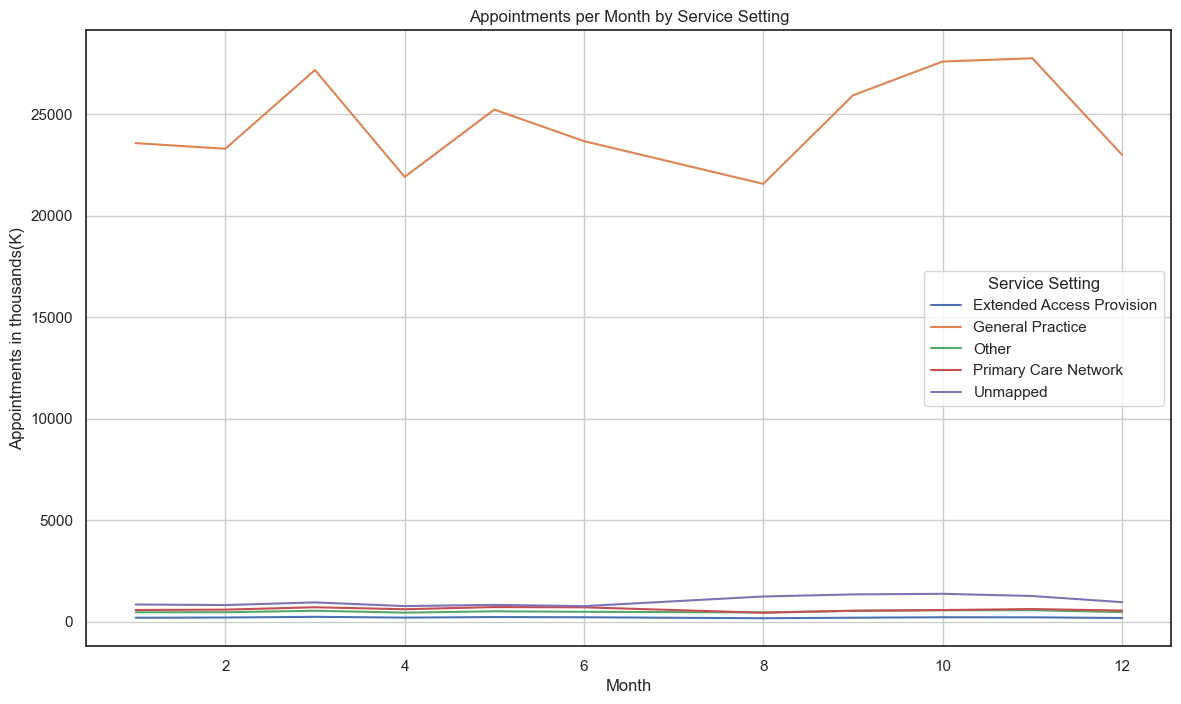

In [47]:
# Use seaborn's lineplot function
sns.lineplot(x='appointment_month', y=(nc_ss['count_of_appointments']/1000), hue='service_setting', data=nc_ss, ci = None )

# Customize the plot 
plt.xlabel('Month')
plt.ylabel('Appointments in thousands(K)')
plt.title('Appointments per Month by Service Setting') 
plt.legend(title='Service Setting')  # Add legend with title
plt.grid(True)

# Show the plot
plt.show()

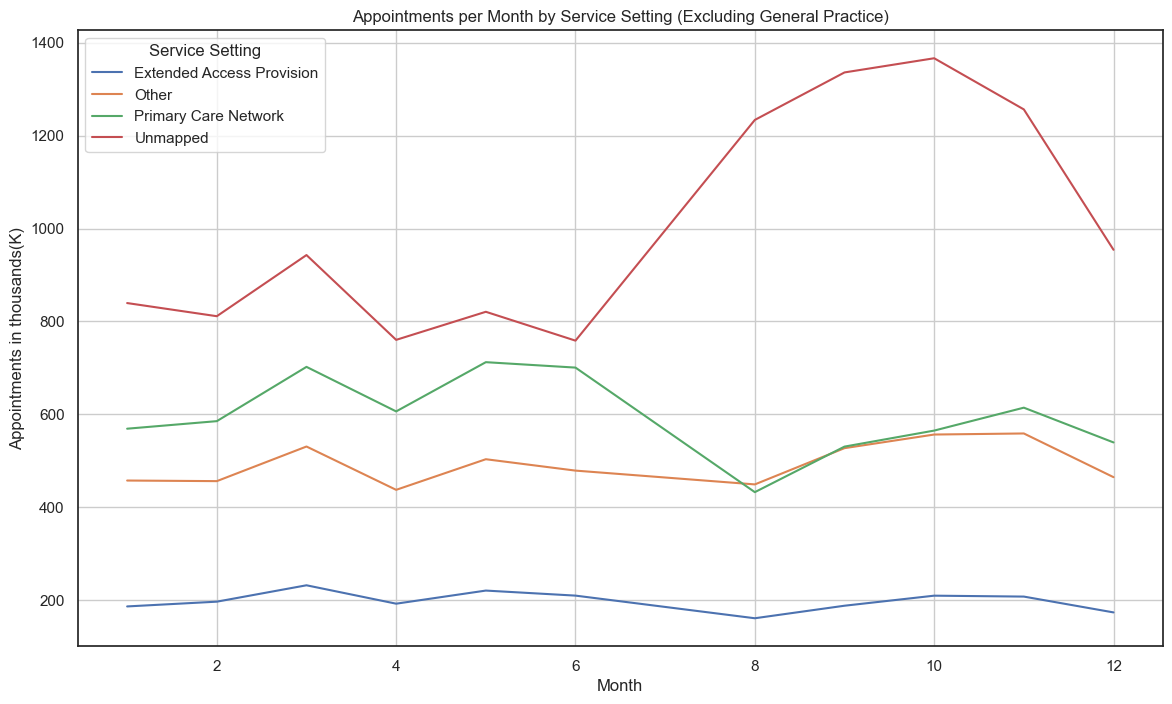

In [48]:
# Filter data excluding general practice
filtered_data_excluding_gp = nc_ss[nc_ss['service_setting'] != 'General Practice']

# Create the line plot
sns.lineplot(x='appointment_month', y=(filtered_data_excluding_gp['count_of_appointments']/1000), 
             hue='service_setting', data=filtered_data_excluding_gp, ci=None)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Appointments in thousands(K)')
plt.title('Appointments per Month by Service Setting (Excluding General Practice)')
plt.legend(title='Service Setting')
plt.grid(True)

# Show the plot
plt.show()

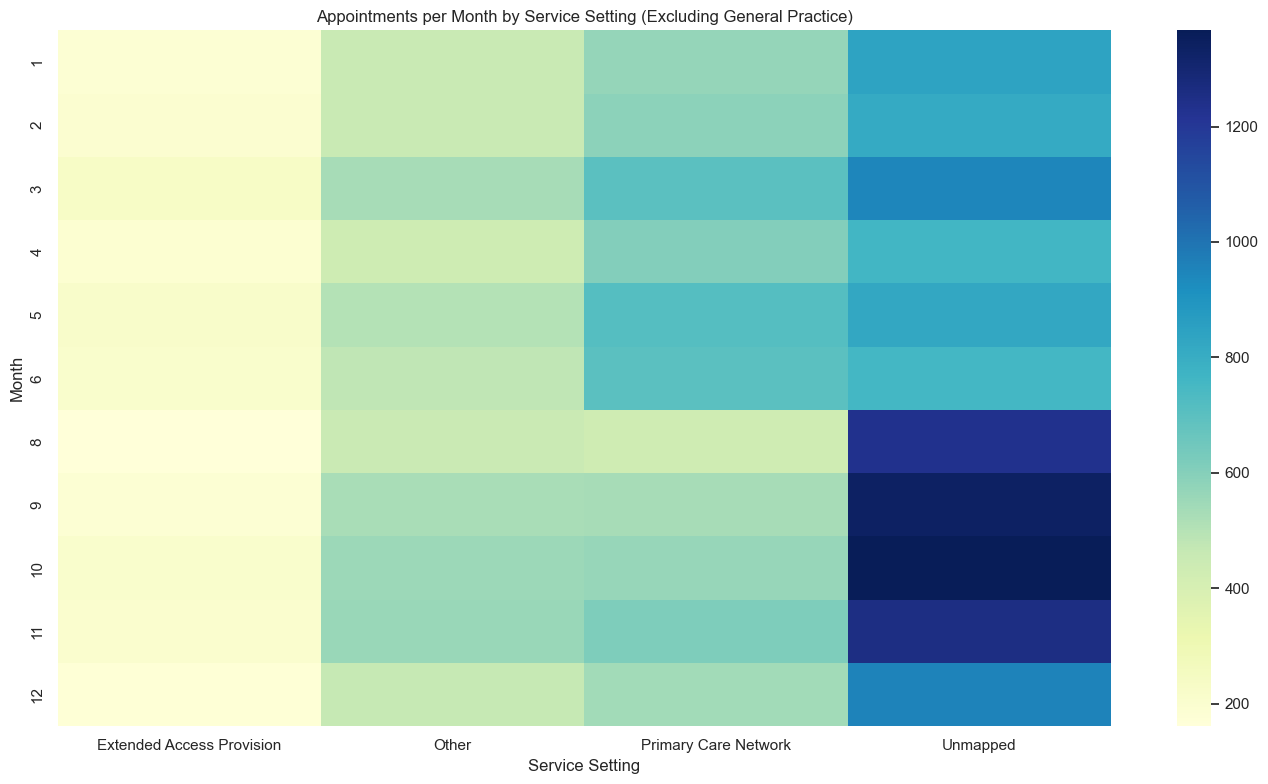

In [49]:
# Pivot table for heatmap
pivot_table = pd.pivot_table(filtered_data_excluding_gp, values='count_of_appointments', index='appointment_month', \
                             columns='service_setting') / 1000

# Create the heatmap
sns.heatmap(pivot_table, annot=False, cmap='YlGnBu')  # Adjust 'cmap' for blue colormap

# Customize the plot
plt.xlabel('Service Setting')
plt.ylabel('Month')
plt.title('Appointments per Month by Service Setting (Excluding General Practice)')
plt.xticks() 
plt.tight_layout()

# Show the plot
plt.show()

> From the heatmap, we find out that there are higher unmapped values in September and October 2021, however, it then decreases in 2022. **Unmapped** – No record of a category against an appointment slot type. This could be due to  an error receiving the data, or an appointment type has not been mapped Further investigations are needed to understand why this is happening and how the data were collected and finding ways to improve the data quality.

**Context types:**

In [50]:
# Group by month and context types, calculate sum, and reset index
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# View the nc_ss DataFrame to verify the data
nc_ct

,appointment_month,context_type,count_of_appointments
0,1,Care Related Encounter,22441947
1,1,Inconsistent Mapping,2353965
2,1,Unmapped,839562
3,2,Care Related Encounter,22211021
4,2,Inconsistent Mapping,2332993
5,2,Unmapped,811246
6,3,Care Related Encounter,25928850
7,3,Inconsistent Mapping,2723276
8,3,Unmapped,942912
9,4,Care Related Encounter,20904193


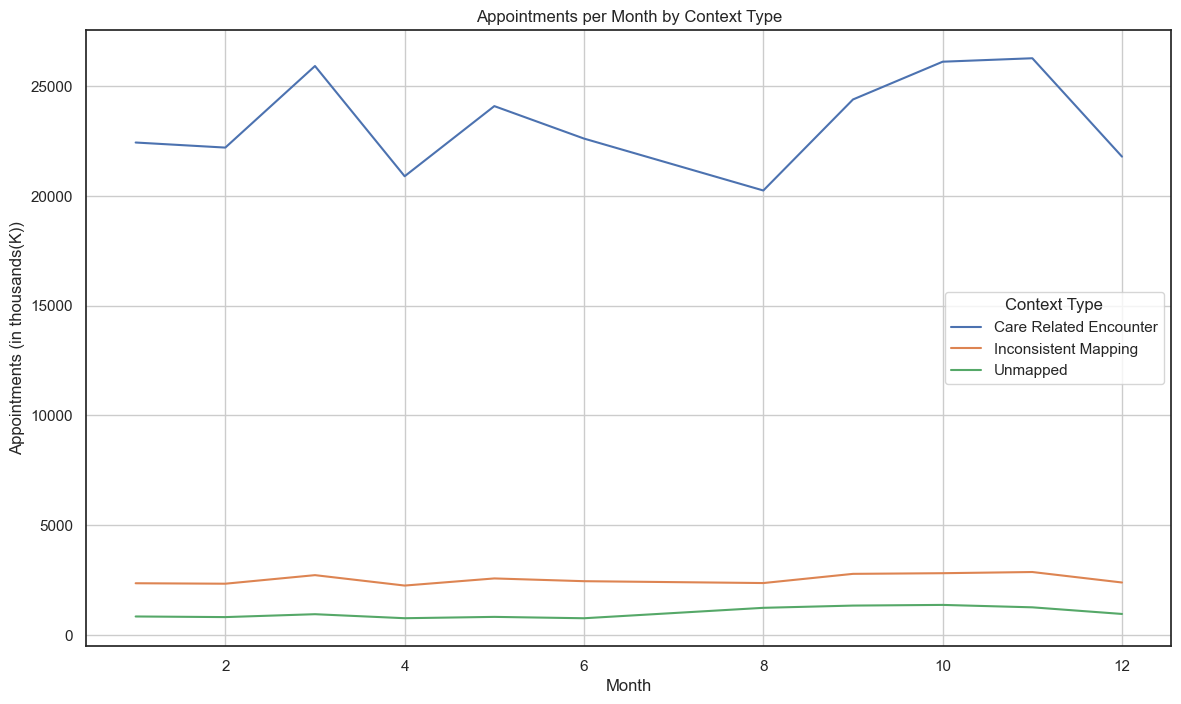

In [51]:
# Plot the appointments over the available date range, and review the context types for months.
# Create the line plot with seaborn
sns.lineplot(x='appointment_month', y=(nc_ct['count_of_appointments']/1000), hue='context_type', data = nc_ct, ci = None)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Appointments (in thousands(K))')
plt.title('Appointments per Month by Context Type')
plt.legend(title='Context Type')  # Add legend with title
plt.grid(True)

# Show the plot
plt.show()

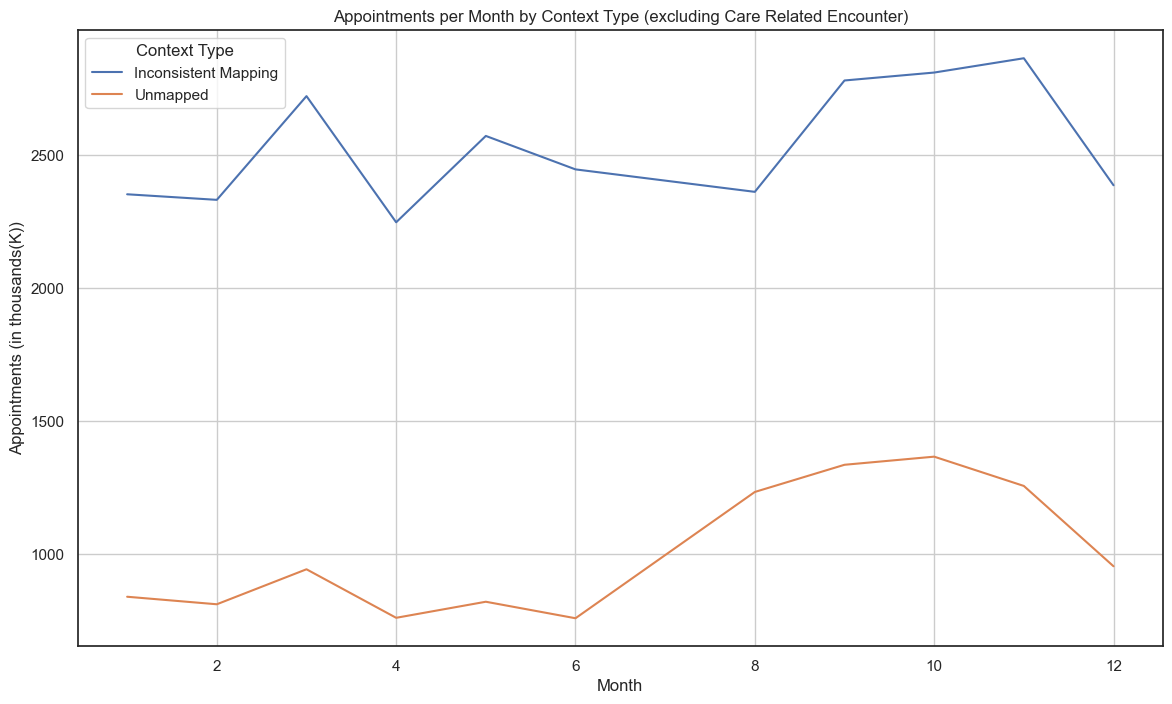

In [52]:
# Filter data excluding Care Related Encounter
filtered_data_excluding_cre = nc_ct[nc_ct['context_type'] != 'Care Related Encounter']

# Plot the appointments over the available date range, and review the context types for months.
# Create the line plot with seaborn
sns.lineplot(x='appointment_month', y=(filtered_data_excluding_cre['count_of_appointments']/1000), hue='context_type', \
             data = filtered_data_excluding_cre, ci = None)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Appointments (in thousands(K))')
plt.title('Appointments per Month by Context Type (excluding Care Related Encounter)')
plt.legend(title='Context Type')  # Add legend with title
plt.grid(True)

# Show the plot
plt.show()

**National categories:**

In [53]:
# Group by month and context types, calculate sum, and reset index
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# Print the nc_ss DataFrame to verify the data
print(nc_nc)

     appointment_month                                  national_category  \
0                    1  Care Home Needs Assessment & Personalised Care...   
1                    1                                    Care Home Visit   
2                    1                                    Clinical Triage   
3                    1                         General Consultation Acute   
4                    1                       General Consultation Routine   
..                 ...                                                ...   
193                 12                         Social Prescribing Service   
194                 12                       Structured Medication Review   
195                 12                                           Unmapped   
196                 12                        Unplanned Clinical Activity   
197                 12                                            Walk-in   

     count_of_appointments  
0                    37988  
1                

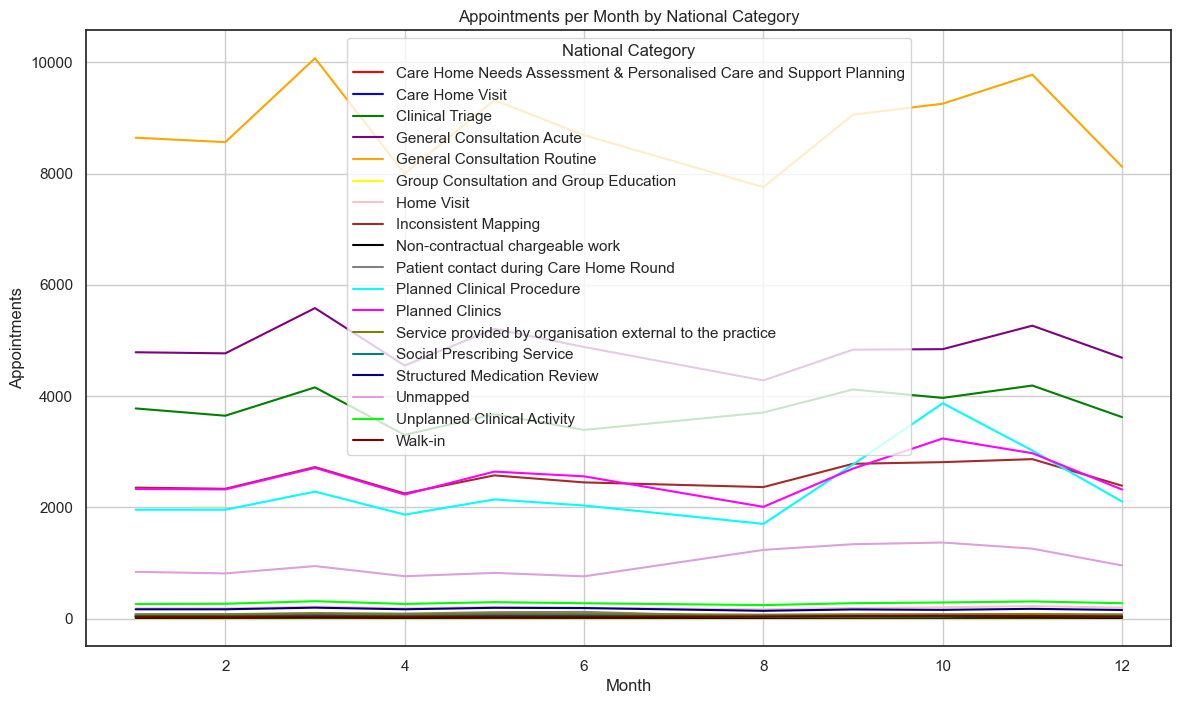

In [54]:
# Plot the appointments over the available date range, and review the context types for months.
# Define a list of colors for the legend
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'pink', 'brown','black', 'gray', 'cyan', 
          'magenta', 'olive', 'teal', 'navy', 'plum','lime', 'maroon']


# Create the line plot with seaborn
sns.lineplot(x='appointment_month', y=(nc_nc['count_of_appointments']/1000), hue='national_category', data = nc_nc, ci = None, palette = colors)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.title('Appointments per Month by National Category')
plt.legend(title='National Category')  # Add legend with title
plt.grid(True)

# Show the plot
plt.show()

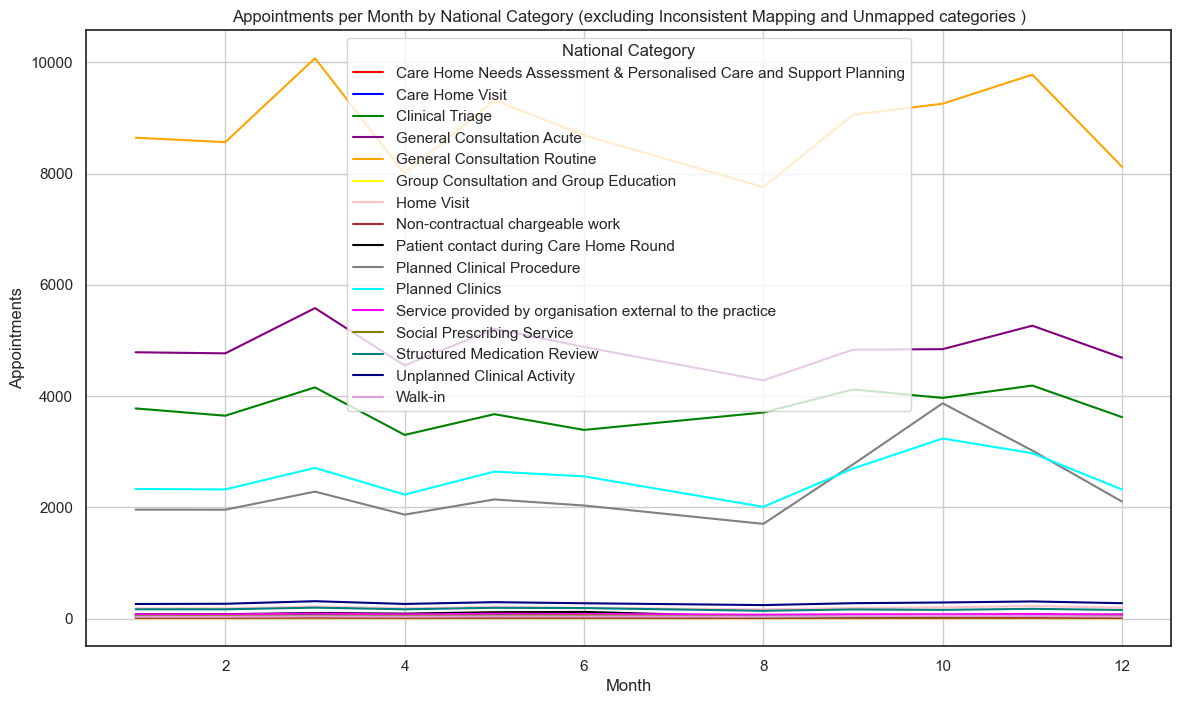

In [55]:
# Filter data (exclude rows with "Inconsistent Mapping" or "Unmapped" in national_category)
filtered_data = nc_nc[~((nc_nc["national_category"].str.contains("Inconsistent Mapping")) | 
                     (nc_nc["national_category"].str.contains("Unmapped")))]

# Create the line plot with seaborn
sns.lineplot(x = 'appointment_month', y = (filtered_data['count_of_appointments']/1000), hue='national_category', data = filtered_data, \
             ci = None, palette = colors)

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Appointments')
plt.title('Appointments per Month by National Category (excluding Inconsistent Mapping and Unmapped categories )')
plt.legend(title='National Category')  # Add legend with title
plt.grid(True)

# Show the plot
plt.show()

**Visualise the Appointment status trend by appointment mode**

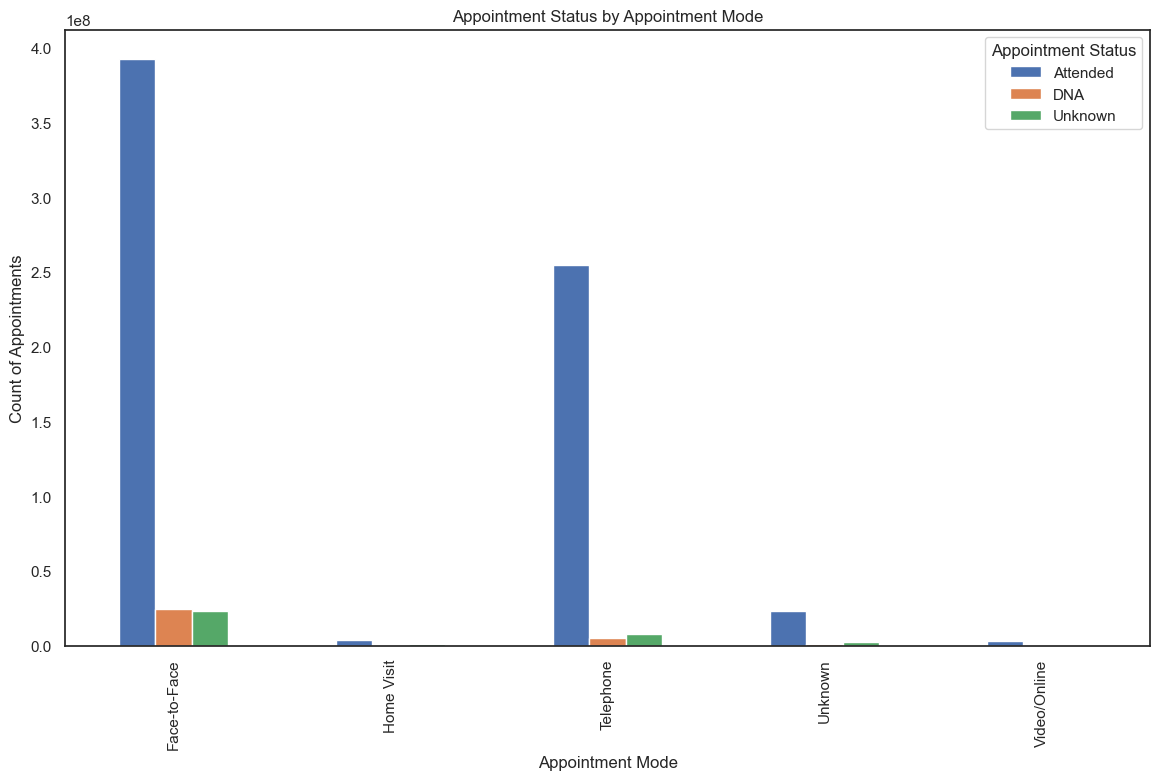

In [56]:
# Create a bar chart showing appointment_status by appointment_mode
appointment_status_by_mode = ar.groupby(["appointment_mode", "appointment_status"])["count_of_appointments"].sum().unstack()
appointment_status_by_mode.plot(kind="bar", stacked=False)

plt.xlabel("Appointment Mode")
plt.ylabel("Count of Appointments")
plt.title("Appointment Status by Appointment Mode")
plt.legend(title="Appointment Status")
plt.show()

In [57]:
# Calculate total appointments per mode
total_appointments_by_mode = ar.groupby("appointment_mode")["count_of_appointments"].sum()

# Calculate percentage of each appointment_status for each mode
appointment_status_percentages = (ar.groupby(["appointment_mode", "appointment_status"])["count_of_appointments"]
                                 .sum() / total_appointments_by_mode) * 100

# Print the result
print(appointment_status_percentages)

appointment_mode  appointment_status
Face-to-Face      Attended              89.255070
                  DNA                    5.512283
                  Unknown                5.232647
Home Visit        Attended              73.898520
                  DNA                    3.837475
                  Unknown               22.264006
Telephone         Attended              95.123086
                  DNA                    1.964533
                  Unknown                2.912381
Unknown           Attended              88.220033
                  DNA                    3.967392
                  Unknown                7.812575
Video/Online      Attended              91.225388
                  DNA                    4.389612
                  Unknown                4.385000
Name: count_of_appointments, dtype: float64


**Overall trends:**
**By Appointment Status**
- Attendance: The "Attended" status is generally the most prevalent across all appointment modes, ranging from the highest 73.89% (Home Visit) and the lowest 95.12% (Telephone). This suggests that most appointments are successfully completed.
- DNA (Did Not Attend): The "DNA" status varies across modes, the lowest rate being 1.96% (Telephone) and the highest 5.51% (Face-to-Face). This indicates that Face-to-Face has the higher chane of missed appointments. 
- Unknown: The "Unknown" status also varies, ranging from 2.26% (Home Visit) to 7.81% (Unknown). This could reflect data quality issues or genuine uncertainty about the appointment status. (In some cases (3%–6% of monthly appointments), 
the final status of an appointment remains as ‘Booked’. It is not known from the data
whether or not these appointments actually attended. For this reason, the status of these 
appointments is reported as 'Unknow)n'.

**By Appointment Mode:**
- Face-to-Face: Has the highest "DNA" rate (5.51%) and the second highest "Unknown" rate (5.23%). This suggests potential challenges with scheduling, reminders, or access for this mode.
- Home Visit: Has the lowest "Attended" rate (73.89%) and the highest "Unknown" rate (22.26%). This could indicate logistical difficulties or patient accessibility issues for home visits.
- Telephone: Has the highest "Attended" rate (95.12%) and the lowest "DNA" and "Unknown" rates. This suggests that telephone appointments might be more convenient and reliable for patients.
- Unknown: Similar to Face-to-Face, has a high "DNA" rate (3.97%) and "Unknown" rate (7.81%). This could be due to the inherent uncertainty of this mode.
- Video/Online: Has a high "Attended" rate (91.23%) and moderate "DNA" and "Unknown" rates. This suggests potential for online appointme.ed.

### Create four visualisations indicating the number of appointments for service setting per season.

**Summer:**


In [58]:
nc.dtypes

appointment_date         datetime64[ns]
icb_ons_code                     object
sub_icb_location_name            object
service_setting                  object
context_type                     object
national_category                object
count_of_appointments             int64
appointment_month                 int32
appointment_year                  int32
dtype: object

In [59]:
# Create a separate data set 
# Group by date of appointment, monthly appointments, and service settings
nc_ss_day = nc.groupby(["appointment_date", "service_setting"])["count_of_appointments"].sum().reset_index()

# View the new DataFrame
print(nc_ss_day)

     appointment_date            service_setting  count_of_appointments
0          2021-08-01  Extended Access Provision                    438
1          2021-08-01           General Practice                   3411
2          2021-08-01                      Other                    401
3          2021-08-01       Primary Care Network                    323
4          2021-08-01                   Unmapped                   1054
...               ...                        ...                    ...
1665       2022-06-30  Extended Access Provision                   9163
1666       2022-06-30           General Practice                1124374
1667       2022-06-30                      Other                  23115
1668       2022-06-30       Primary Care Network                  34774
1669       2022-06-30                   Unmapped                  35320

[1670 rows x 3 columns]


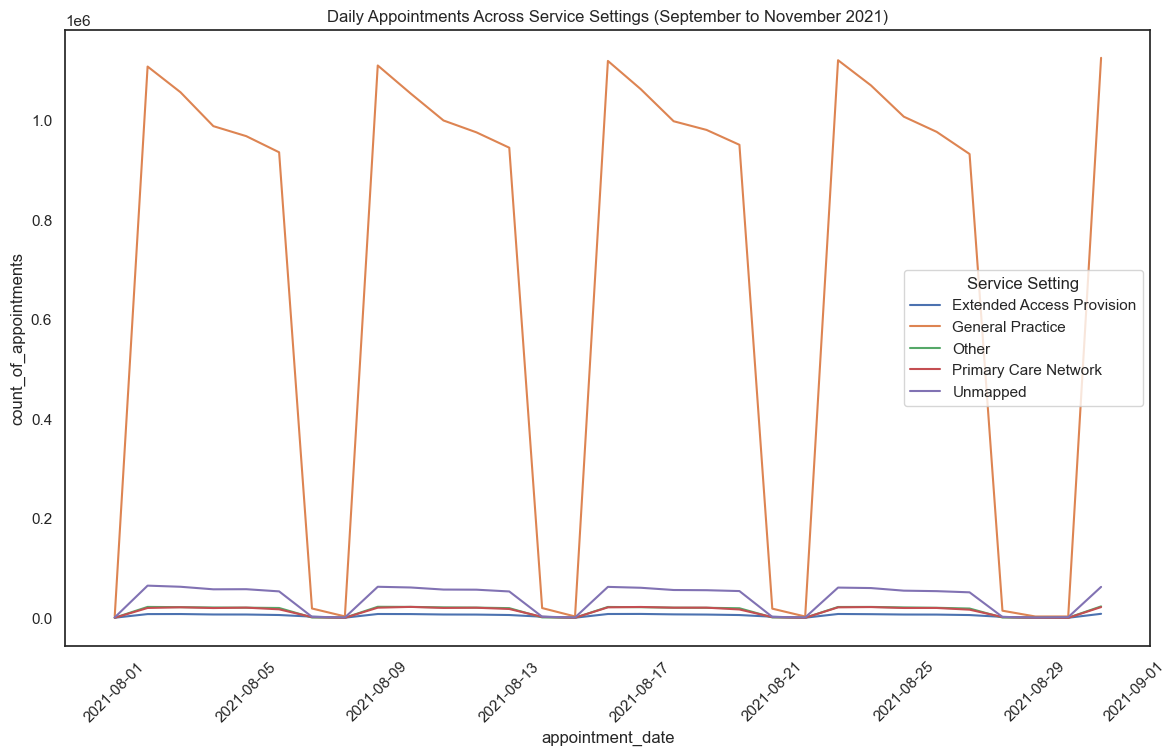

In [60]:
# Visualise the subset using a lineplot.
# Filter data for (June to August 2021)
filtered_data_summer = nc_ss_day[(nc_ss_day["appointment_date"] >= '2021-06-30') & (nc_ss_day["appointment_date"] <= '2021-08-31')]

# Specify variables and data
x = "appointment_date"
y = "count_of_appointments"
hue = "service_setting"
data = filtered_data_summer

# Create the line plot
sns.lineplot(x=x, y=y, hue=hue, data=data, ci = None )
plt.xlabel(x)
plt.ylabel(y)
plt.title("Daily Appointments Across Service Settings (September to November 2021)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Service Setting")
plt.show()

**Autumn:**

In [61]:
# Filter data for (September to November 2021)
filtered_data_autumn = nc_ss_day[(nc_ss_day["appointment_date"] >= '2021-09-01') & (nc_ss_day["appointment_date"] <= '2021-11-30')]

# View the output
filtered_data_autumn

,appointment_date,service_setting,count_of_appointments
155,2021-09-01,Extended Access Provision,6916
156,2021-09-01,General Practice,1041879
157,2021-09-01,Other,21796
158,2021-09-01,Primary Care Network,21371
159,2021-09-01,Unmapped,57423
...,...,...,...
605,2021-11-30,Extended Access Provision,9077
606,2021-11-30,General Practice,1254637
607,2021-11-30,Other,24681
608,2021-11-30,Primary Care Network,30215


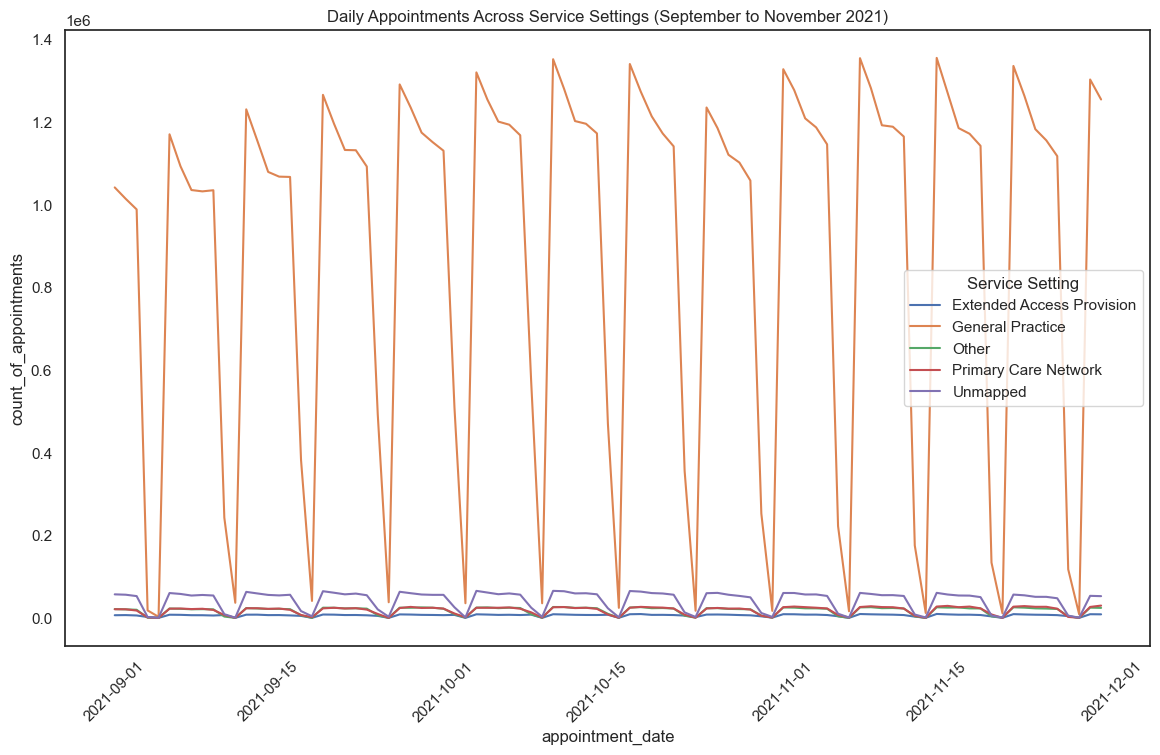

In [62]:
# Visualise the subset using a lineplot.
# Specify variables and data
x = "appointment_date"
y = "count_of_appointments"
hue = "service_setting"
data = filtered_data_autumn

# Create the line plot
sns.lineplot(x=x, y=y, hue=hue, data=data, ci = None )
plt.xlabel(x)
plt.ylabel(y)
plt.title("Daily Appointments Across Service Settings (September to November 2021)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Service Setting")
plt.show()

**Winter:**

In [63]:
# Create a separate data set that can be used in future weeks. 
# Filter data for (December to February 2022)
filtered_data_winter = nc_ss_day[(nc_ss_day["appointment_date"] >= '2021-12-31') & (nc_ss_day["appointment_date"] <= '2022-02-28')]

# View the output.
filtered_data_winter

,appointment_date,service_setting,count_of_appointments
760,2021-12-31,Extended Access Provision,4872
761,2021-12-31,General Practice,774919
762,2021-12-31,Other,14841
763,2021-12-31,Primary Care Network,14076
764,2021-12-31,Unmapped,27570
...,...,...,...
1055,2022-02-28,Extended Access Provision,10538
1056,2022-02-28,General Practice,1301433
1057,2022-02-28,Other,25280
1058,2022-02-28,Primary Care Network,30966


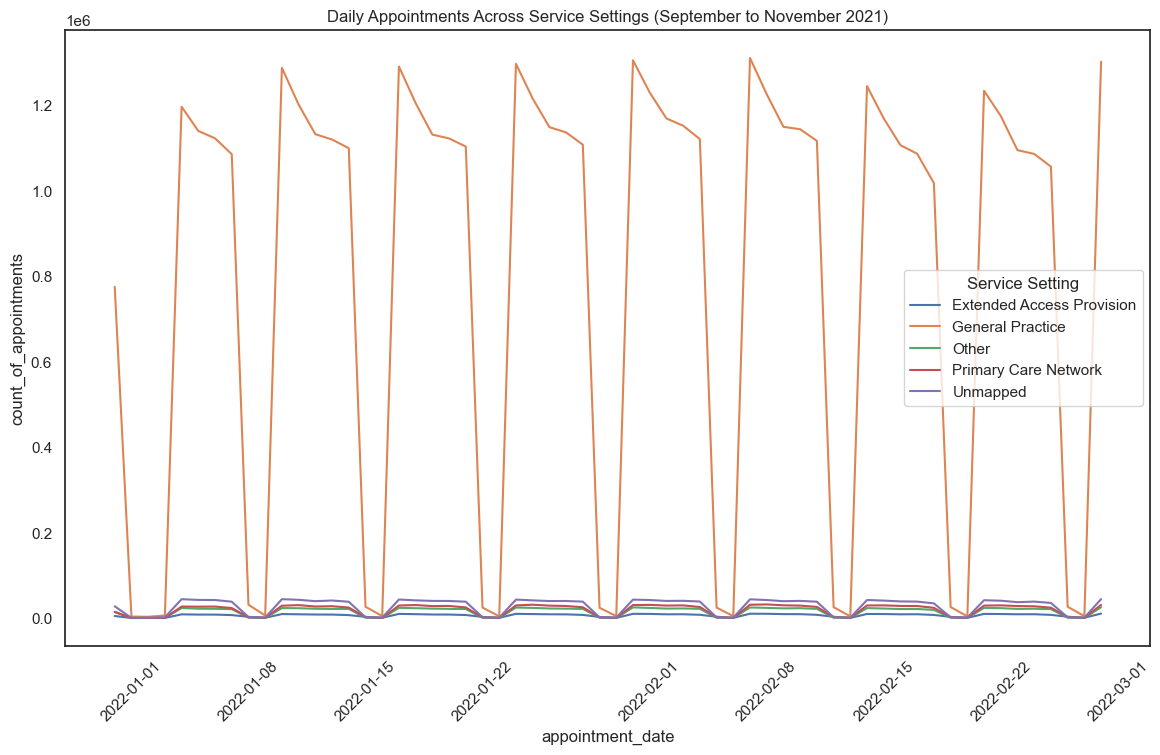

In [64]:
# Visualise the subset using a lineplot.
# Specify variables and data
x = "appointment_date"
y = "count_of_appointments"
hue = "service_setting"
data = filtered_data_winter

# Create the line plot
sns.lineplot(x=x, y=y, hue=hue, data=data, ci = None )
plt.xlabel(x)
plt.ylabel(y)
plt.title("Daily Appointments Across Service Settings (September to November 2021)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Service Setting")
plt.show()

**Spring:**

In [65]:
# Create a separate data set that can be used in future weeks. 
# Filter data for (March to May 2022)
filtered_data_spring = nc_ss_day[(nc_ss_day["appointment_date"] >= '2022-03-31') & (nc_ss_day["appointment_date"] <= '2022-05-31')]

# View the output.
filtered_data_spring

,appointment_date,service_setting,count_of_appointments
1210,2022-03-31,Extended Access Provision,9232
1211,2022-03-31,General Practice,1118804
1212,2022-03-31,Other,22044
1213,2022-03-31,Primary Care Network,29782
1214,2022-03-31,Unmapped,38646
...,...,...,...
1515,2022-05-31,Extended Access Provision,10165
1516,2022-05-31,General Practice,1154859
1517,2022-05-31,Other,23079
1518,2022-05-31,Primary Care Network,32851


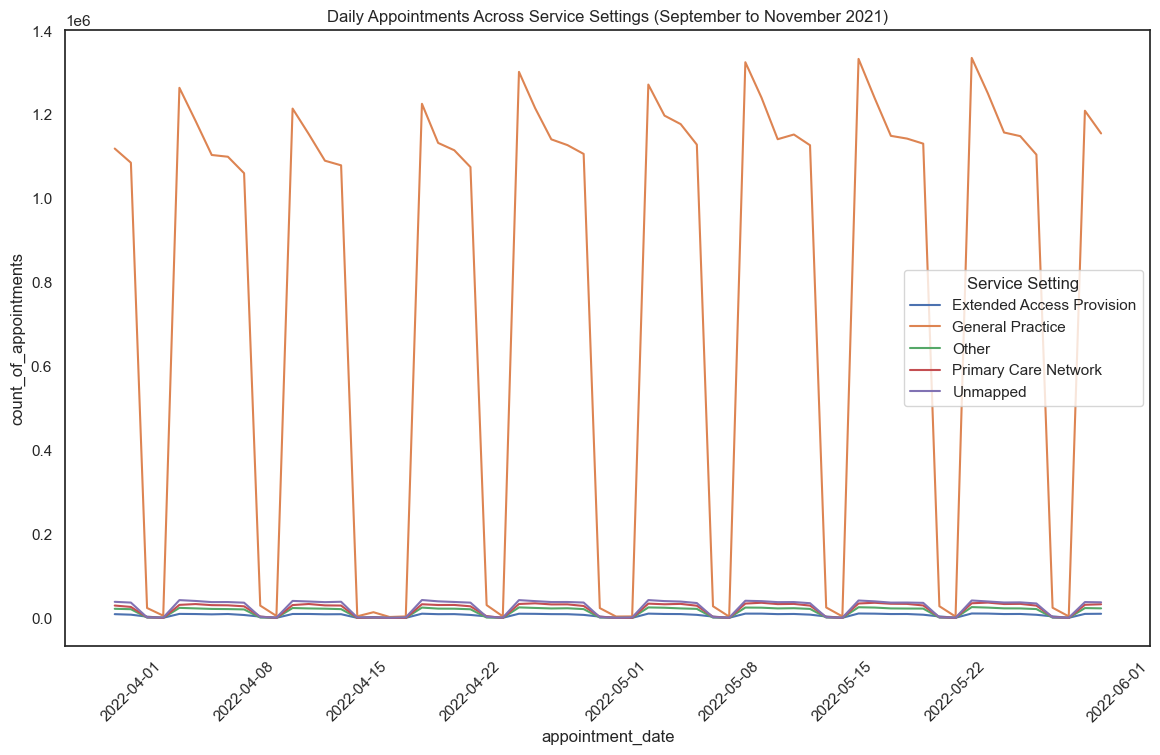

In [66]:
# Visualise the subset using a lineplot.
# Specify variables and data
x = "appointment_date"
y = "count_of_appointments"
hue = "service_setting"
data = filtered_data_spring

# Create the line plot
sns.lineplot(x = x, y = y, hue = hue, data=data, ci = None )
plt.xlabel(x)
plt.ylabel(y)
plt.title("Daily Appointments Across Service Settings (September to November 2021)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Service Setting")
plt.show()

# 

## 5) Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [67]:
# Set the figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display.
pd.options.display.max_colwidth = 200

In [68]:
# Load the data set.
tweets = pd.read_csv('tweets.csv')

# View the DataFrame.
print(tweets.shape)
print(tweets.dtypes)
print(tweets.head())
print(tweets.tail())

(1174, 10)
tweet_id                    int64
tweet_full_text            object
tweet_entities             object
tweet_entities_hashtags    object
tweet_metadata             object
tweet_retweet_count         int64
tweet_favorite_count        int64
tweet_favorited              bool
tweet_retweeted              bool
tweet_lang                 object
dtype: object
              tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT 

In [69]:
# Explore the metadata and data set.
tweets.describe()

,tweet_id,tweet_retweet_count,tweet_favorite_count
count,1.174000e+03,1174.000000,1174.00000
mean,1.567612e+18,8.629472,0.37138
std,2.427553e+13,29.784675,2.04470
min,1.567574e+18,0.000000,0.00000
25%,1.567590e+18,0.000000,0.00000
50%,1.567611e+18,1.000000,0.00000
75%,1.567633e+18,3.000000,0.00000
max,1.567655e+18,303.000000,42.00000


In [70]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [71]:
# Would it be useful to only look at retweeted and favourite tweet messages?
print(tweets["tweet_retweet_count"].value_counts(ascending = False), "\n", tweets["tweet_favorite_count"].value_counts(ascending = False))
# Explain your answer.


tweet_retweet_count
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: count, dtype: int64 
 tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: count, dtype: int64


In [72]:
# Create a new DataFrame with only text columns
tweets_text = pd.DataFrame(tweets['tweet_full_text'])

# View the first few rows
tweets_text.head()  

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."


In [73]:
# Loop through the messages, and create a list of values containing the # symbol.
# Create an empty list to store hashtags
tags = []

# Loop through Split Words
for y in [x.split(' ') for x in tweets_text['tweet_full_text'].values]: # split() function is used to split the text into wordsS
  for z in y:
    if '#' in z: # check for hashtag 
        # change to lowercase the letter
        tags.append(z.lower())

# Create a Series to count the occurrences of hashtags
tags_series = pd.Series(tags).value_counts()

# Display the first 30 most frequent hashtags
print(tags_series.head(30))

#healthcare                    716
#health                         80
#medicine                       41
#ai                             40
#job                            38
#medical                        35
#strategy                       30
#pharmaceutical                 28
#digitalhealth                  25
#pharma                         25
#marketing                      25
#medtwitter                     24
#biotech                        24
#competitiveintelligence        24
#meded                          23
#vaccine                        18
#hiring                         18
#news                           17
#machinelearning                17
#technology                     17
#coronavirus                    16
#womeninmedicine                16
#covid                          16
#competitivemarketing           16
#wellness                       15
#healthtech                     15
#doctorofveterinarymedicine     14
#science                        14
#medicare           

In [74]:
# Convert Series to DataFrame
tags_df = tags_series.to_frame(name='Count').reset_index()

# Rename columns for clarity
tags_df.columns = ['Hashtag Words', 'Count']

# Display the first 30 most frequent hashtags
tags_df.head(30)

,Hashtag Words,Count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
5,#medical,35
6,#strategy,30
7,#pharmaceutical,28
8,#digitalhealth,25
9,#pharma,25


In [75]:
# Double check if the count data type is an integer
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hashtag Words  1754 non-null   object
 1   Count          1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB


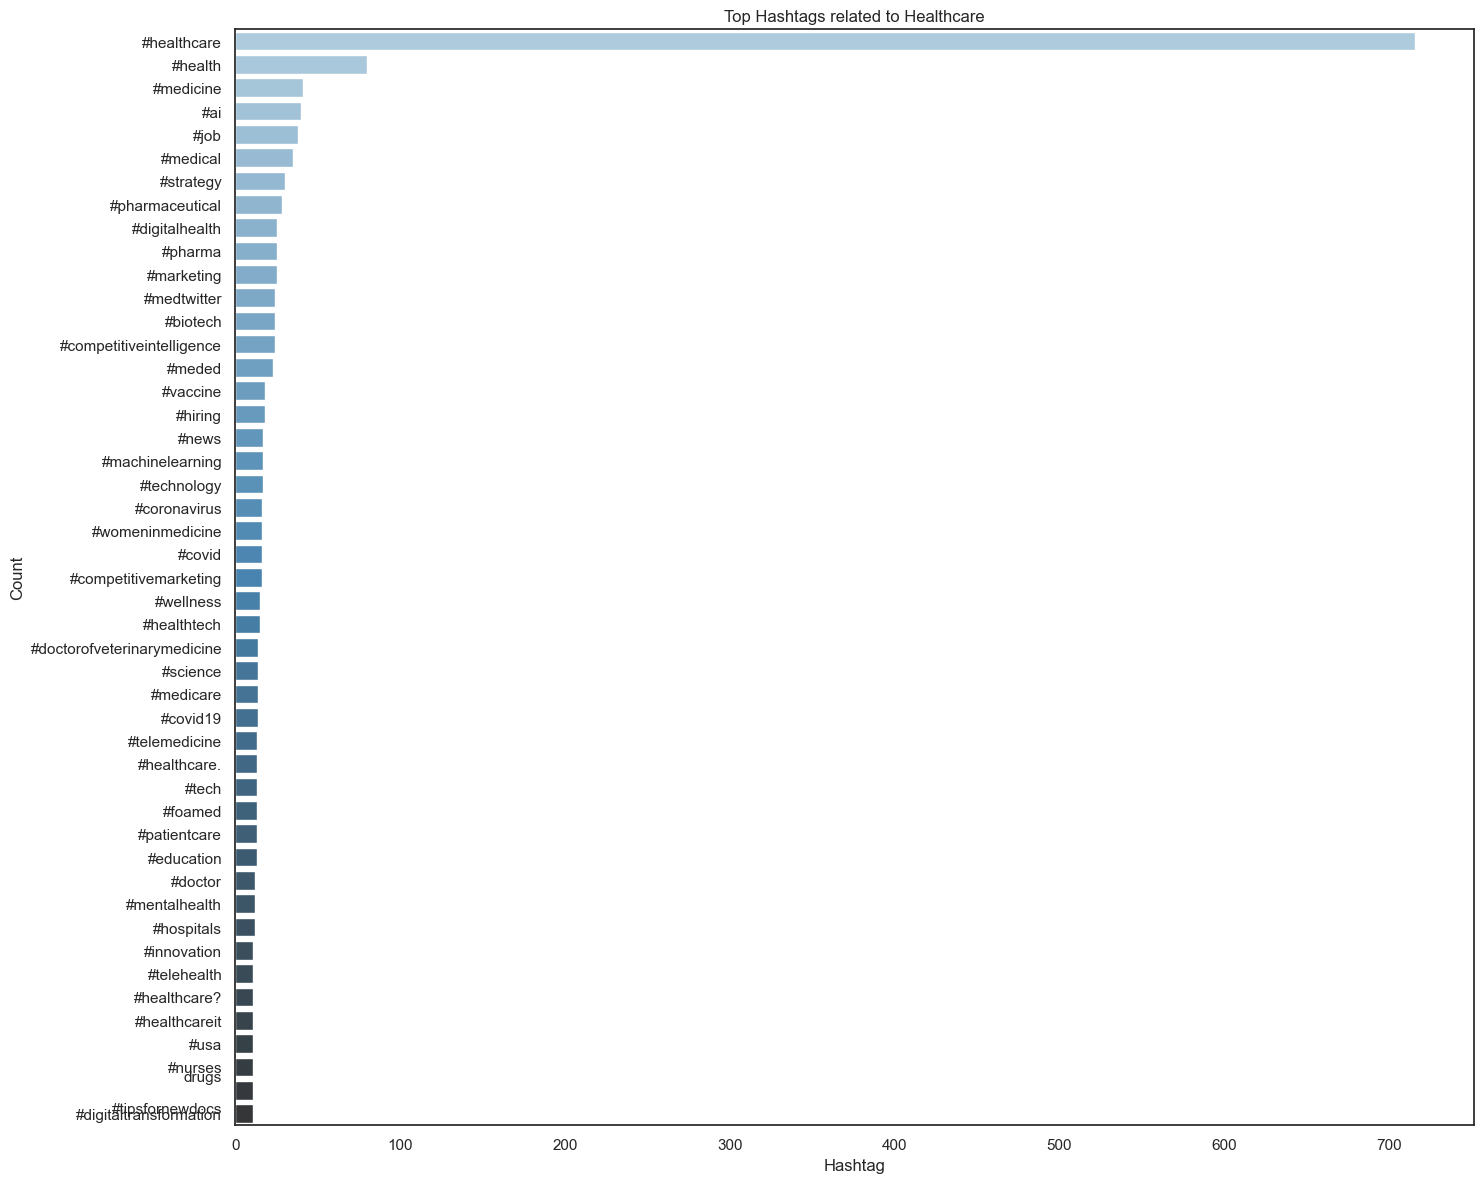

In [76]:
# Display records where the count is larger than 10.
# Filter hashtags with count > 10
filtered_tags = tags_df[tags_df['Count'] > 10]

# Create a color palette using seaborn's diverging palette
palette = sns.color_palette("Blues_d", len(filtered_tags))

# Create the bar plot
sns.barplot(x = 'Count', y = 'Hashtag Words', data = filtered_tags, palette = palette)

# Customize the plot (optional)
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.title('Top Hashtags related to Healthcare')
plt.tight_layout()  # Adjust spacing

# View the plot
plt.show()

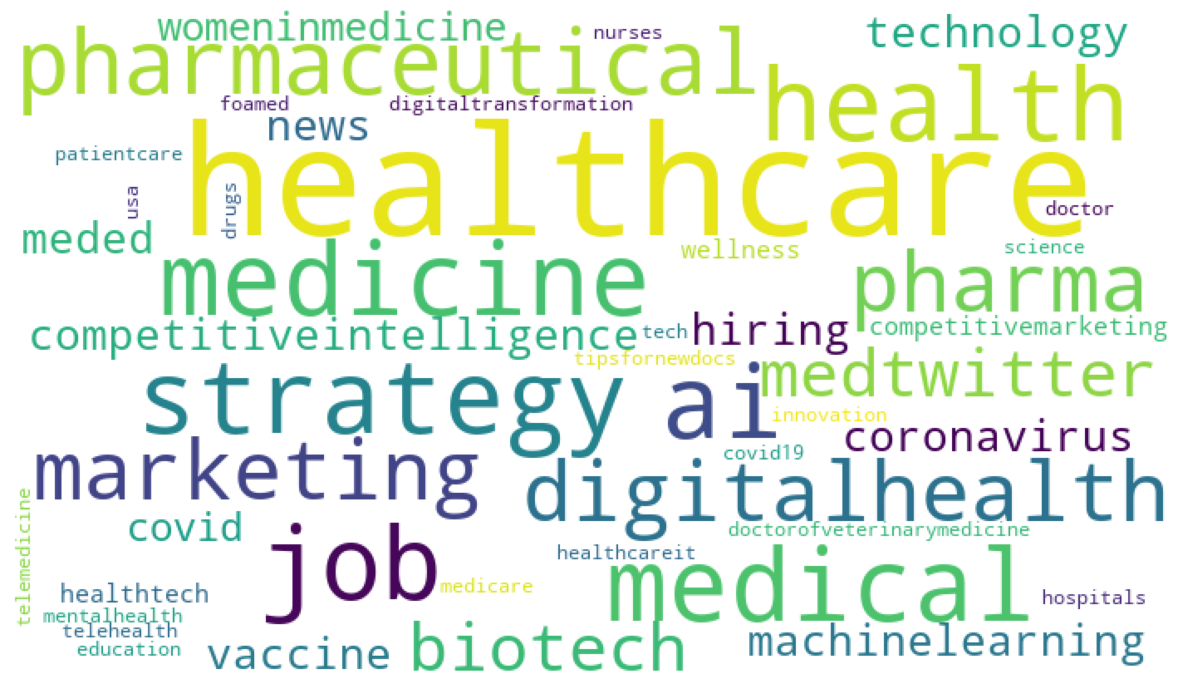

In [77]:
# Extract hashtag words from the DataFrame
hashtag_words = ' '.join(filtered_tags['Hashtag Words'].tolist())

from wordcloud import WordCloud

# Create the word cloud (resolution increased & changed the background color)
wordcloud = WordCloud(width=700, height=400, background_color="white").generate(hashtag_words)
# Display the word cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# 

## 6) Assignment activity 6
In the final module you will answer additional questions from the NHS as well as additional questions and observations you identified. Make sure to revisit previous sections that may provide useful insights to the questions posed in Module 6 where required.

### Investigate the main concerns posed by the NHS. 

In [78]:
# Prepare your workstation.
# Load the appointments_regional.csv file.
ar = pd.read_csv('appointments_regional.csv')

# View the first five row of the DataFrame.
ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [79]:
# Print the min and max dates.
print( "The minimum and maximum dates pertaining to the ar data set are:\n" , ar['appointment_month'].min(), "-",ar['appointment_month'].max())

The minimum and maximum dates pertaining to the ar data set are:
 2020-01 - 2022-06


In [80]:
# Filter data from 2021-08 onwards 
date_filtered_ar = ar[ar['appointment_month'] >= '2021-08-01']

# Display the first five rows of the filtered DataFrame
date_filtered_ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
3850,E54000034,2021-09,Attended,GP,Face-to-Face,1 Day,8288
3851,E54000034,2021-09,Attended,GP,Face-to-Face,15 to 21 Days,3827
3852,E54000034,2021-09,Attended,GP,Face-to-Face,2 to 7 Days,13466
3853,E54000034,2021-09,Attended,GP,Face-to-Face,22 to 28 Days,1300
3854,E54000034,2021-09,Attended,GP,Face-to-Face,8 to 14 Days,6825


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [81]:
# Create an aggregated data set to review the different features.
# Group data by specified columns
ar_agg = ar.groupby(['appointment_month', 'appointment_status', 'hcp_type', 'appointment_mode', 'time_between_book_and_appointment'])\
          .agg({'count_of_appointments':'sum'}).reset_index()

# View the first few rows of the new DataFrame
ar_agg

,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2020-01,Attended,GP,Face-to-Face,1 Day,653846
1,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,620789
2,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,1723834
3,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,421189
4,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,1123186
...,...,...,...,...,...,...
10134,2022-06,Unknown,Unknown,Unknown,8 to 14 Days,5494
10135,2022-06,Unknown,Unknown,Unknown,More than 28 Days,5115
10136,2022-06,Unknown,Unknown,Unknown,Same Day,1914
10137,2022-06,Unknown,Unknown,Unknown,Unknown / Data Quality,53


In [82]:
# Filter rows where time_between_book_and_appointment is not "Unknown / Data Quality"
filtered_ar_agg = ar_agg[ar_agg['time_between_book_and_appointment'] == "Unknown / Data Quality"]

# View the first few rows of the updated DataFrame
filtered_ar_agg

,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
7,2020-01,Attended,GP,Face-to-Face,Unknown / Data Quality,1348
15,2020-01,Attended,GP,Home Visit,Unknown / Data Quality,329
23,2020-01,Attended,GP,Telephone,Unknown / Data Quality,794
31,2020-01,Attended,GP,Unknown,Unknown / Data Quality,146
46,2020-01,Attended,Other Practice staff,Face-to-Face,Unknown / Data Quality,2019
...,...,...,...,...,...,...
10105,2022-06,Unknown,Other Practice staff,Video/Online,Unknown / Data Quality,3
10113,2022-06,Unknown,Unknown,Face-to-Face,Unknown / Data Quality,246
10121,2022-06,Unknown,Unknown,Home Visit,Unknown / Data Quality,14
10129,2022-06,Unknown,Unknown,Telephone,Unknown / Data Quality,12


In [83]:
# Determine the total number of appointments per month.
ar_df = ar_agg.groupby('appointment_month').agg({'count_of_appointments':'sum'}).reset_index()

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
ar_df['avg_daily_service_utilisation']= (ar_df['count_of_appointments']/30).astype(int)

# View the DataFrame.
ar_df

,appointment_month,count_of_appointments,avg_daily_service_utilisation
0,2020-01,27199296,906643
1,2020-02,24104621,803487
2,2020-03,24053468,801782
3,2020-04,16007881,533596
4,2020-05,16417212,547240
5,2020-06,20690805,689693
6,2020-07,22491437,749714
7,2020-08,20150520,671684
8,2020-09,26714255,890475
9,2020-10,28301932,943397


In [84]:
# Check the data type of the dataframe
ar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   appointment_month              30 non-null     object
 1   count_of_appointments          30 non-null     int64 
 2   avg_daily_service_utilisation  30 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


> The NHS has provided a figure of an average of 1,200,000 appointments per day being used for planning purposes, which you can use as a guideline for maximum capacity.

In [85]:
# Plot sum of count of monthly visits.
ar_df.appointment_month = pd.to_datetime(ar_df.appointment_month)

# Applies a lambda function to each element, and formats the date as a string with month abbreviation and year (e.g.,"Oct-2023").
ar_df.appointment_month = ar_df['appointment_month'].apply(lambda x: x.strftime('%b-%Y'))
avg_daily_appointment_capacity_nhs = 1200000

# To find the percentage difference we use the formula [(first value - second value)/(first value + second value)/2]*100
ar_df['appointment_gap']= ((avg_daily_appointment_capacity_nhs - ar_df['avg_daily_service_utilisation'])\
                           /ar_df['avg_daily_service_utilisation']*100)

# View the percentage of 'appointment_gap' between the actual 'avg_daily_service_utilisation' and 
# the 'avg_daily_service_utilisation' provided by NHS
print("View the average appointment utilisaiton gap (%) between the actual and the NHS provided:\n ")
ar_df

View the average appointment utilisaiton gap (%) between the actual and the NHS provided:
 


,appointment_month,count_of_appointments,avg_daily_service_utilisation,appointment_gap
0,Jan-2020,27199296,906643,32.356396
1,Feb-2020,24104621,803487,49.349025
2,Mar-2020,24053468,801782,49.666618
3,Apr-2020,16007881,533596,124.889242
4,May-2020,16417212,547240,119.282216
5,Jun-2020,20690805,689693,73.990457
6,Jul-2020,22491437,749714,60.061037
7,Aug-2020,20150520,671684,78.655439
8,Sep-2020,26714255,890475,34.759538
9,Oct-2020,28301932,943397,27.199896


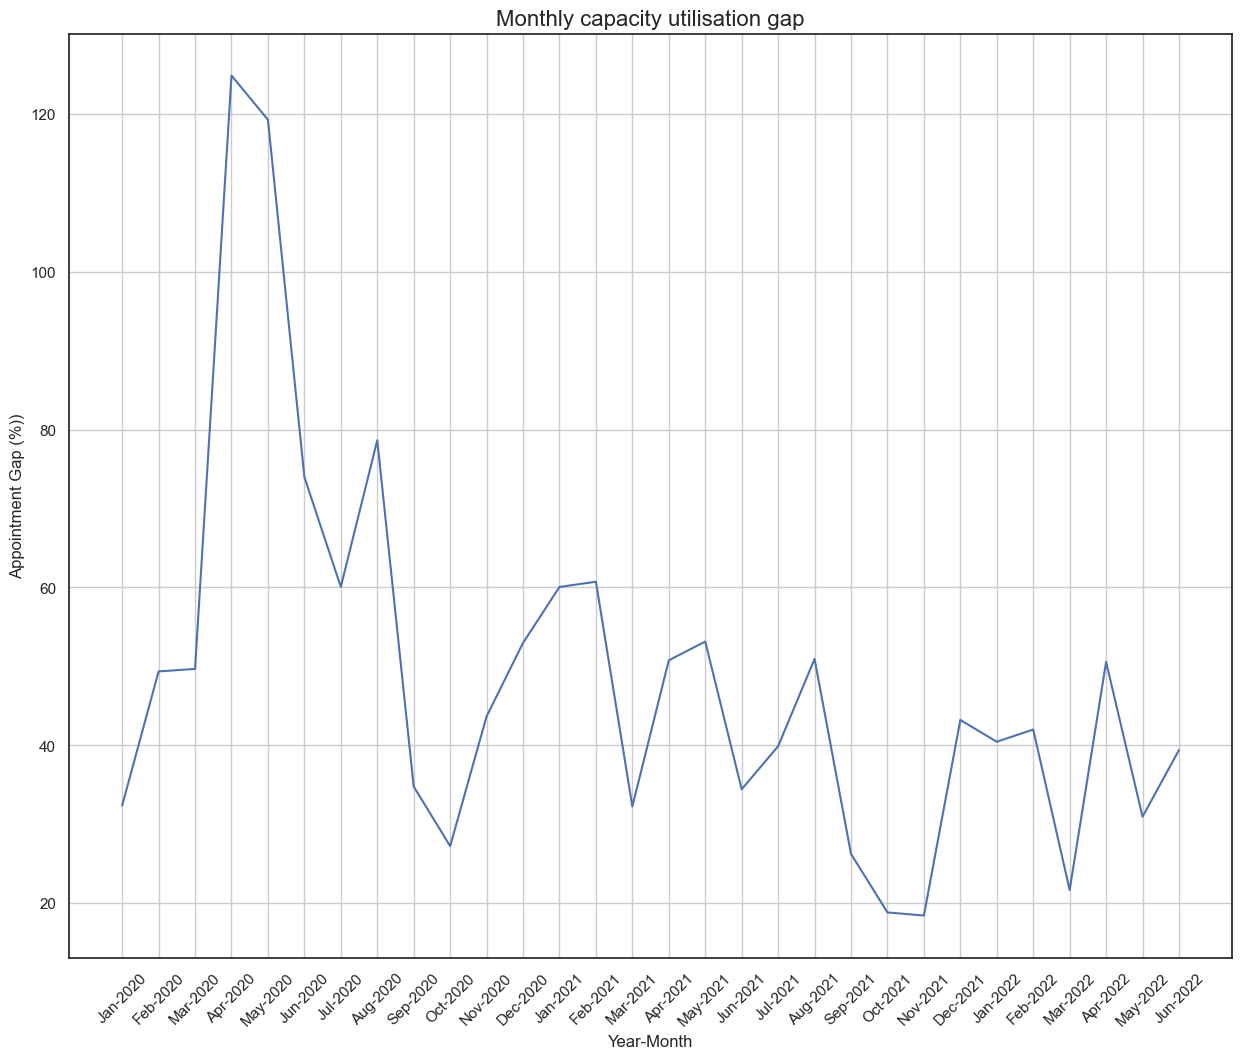

In [86]:
# Plot monthly capacity utilisation gap.
sns.lineplot(data = ar_df, x = ar_df['appointment_month'], y = ar_df['appointment_gap'])

# Create a lineplot.
plt.title("Monthly capacity utilisation gap",fontsize=16)
plt.xlabel("Year-Month")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.ylabel("Appointment Gap (%))")
plt.grid(True)

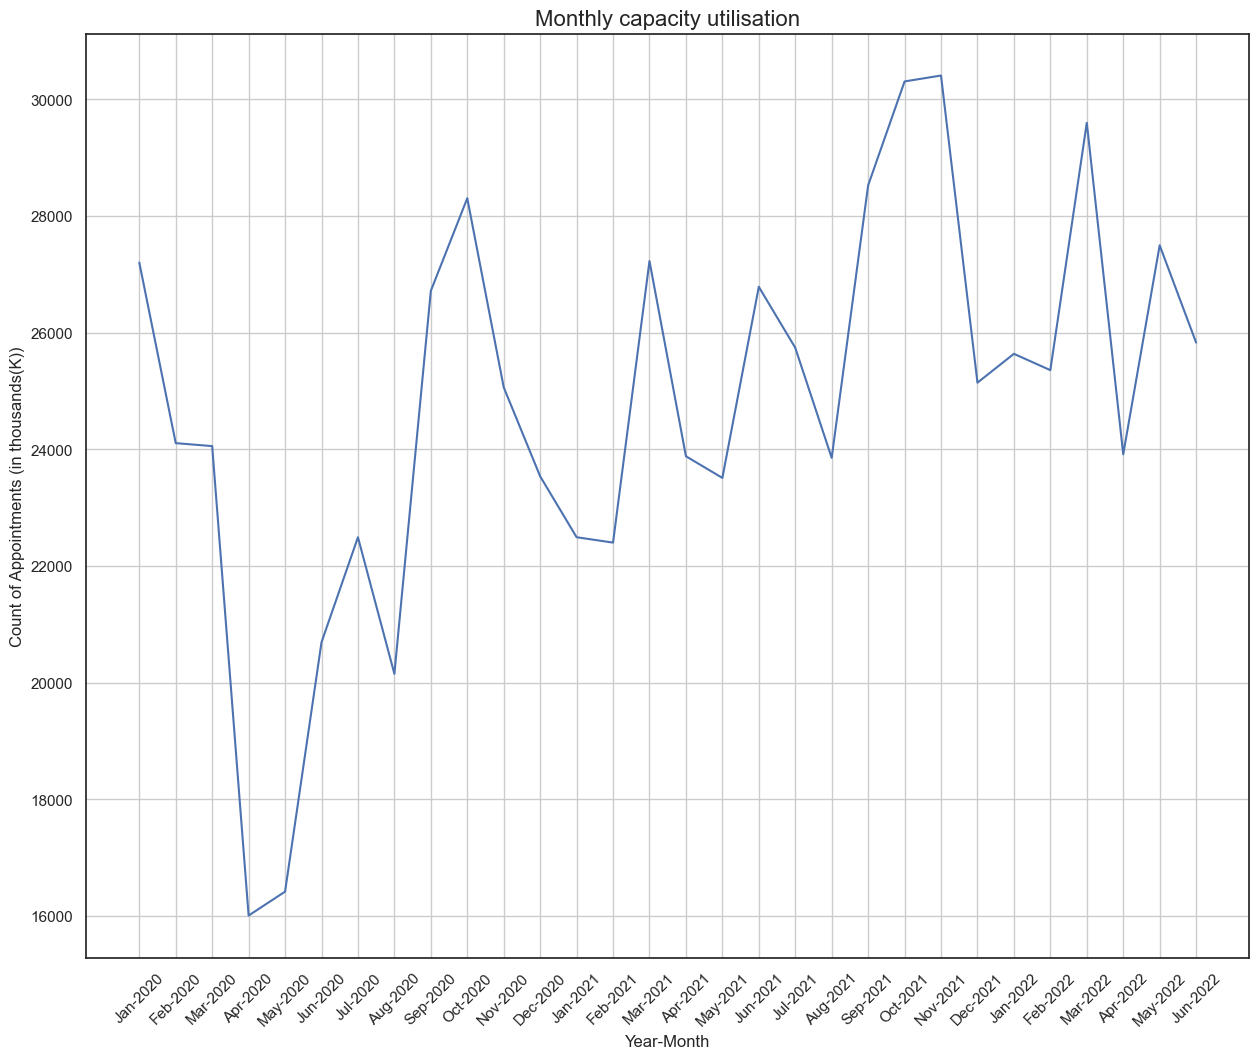

In [87]:
# Plot monthly capacity utilisation.
sns.lineplot(data = ar_df, x = ar_df['appointment_month'], y = (ar_df.count_of_appointments/1000))

# Create a lineplot.
plt.title("Monthly capacity utilisation",fontsize=16)
plt.xlabel("Year-Month")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.ylabel("Count of Appointments (in thousands(K))")
plt.grid(True)

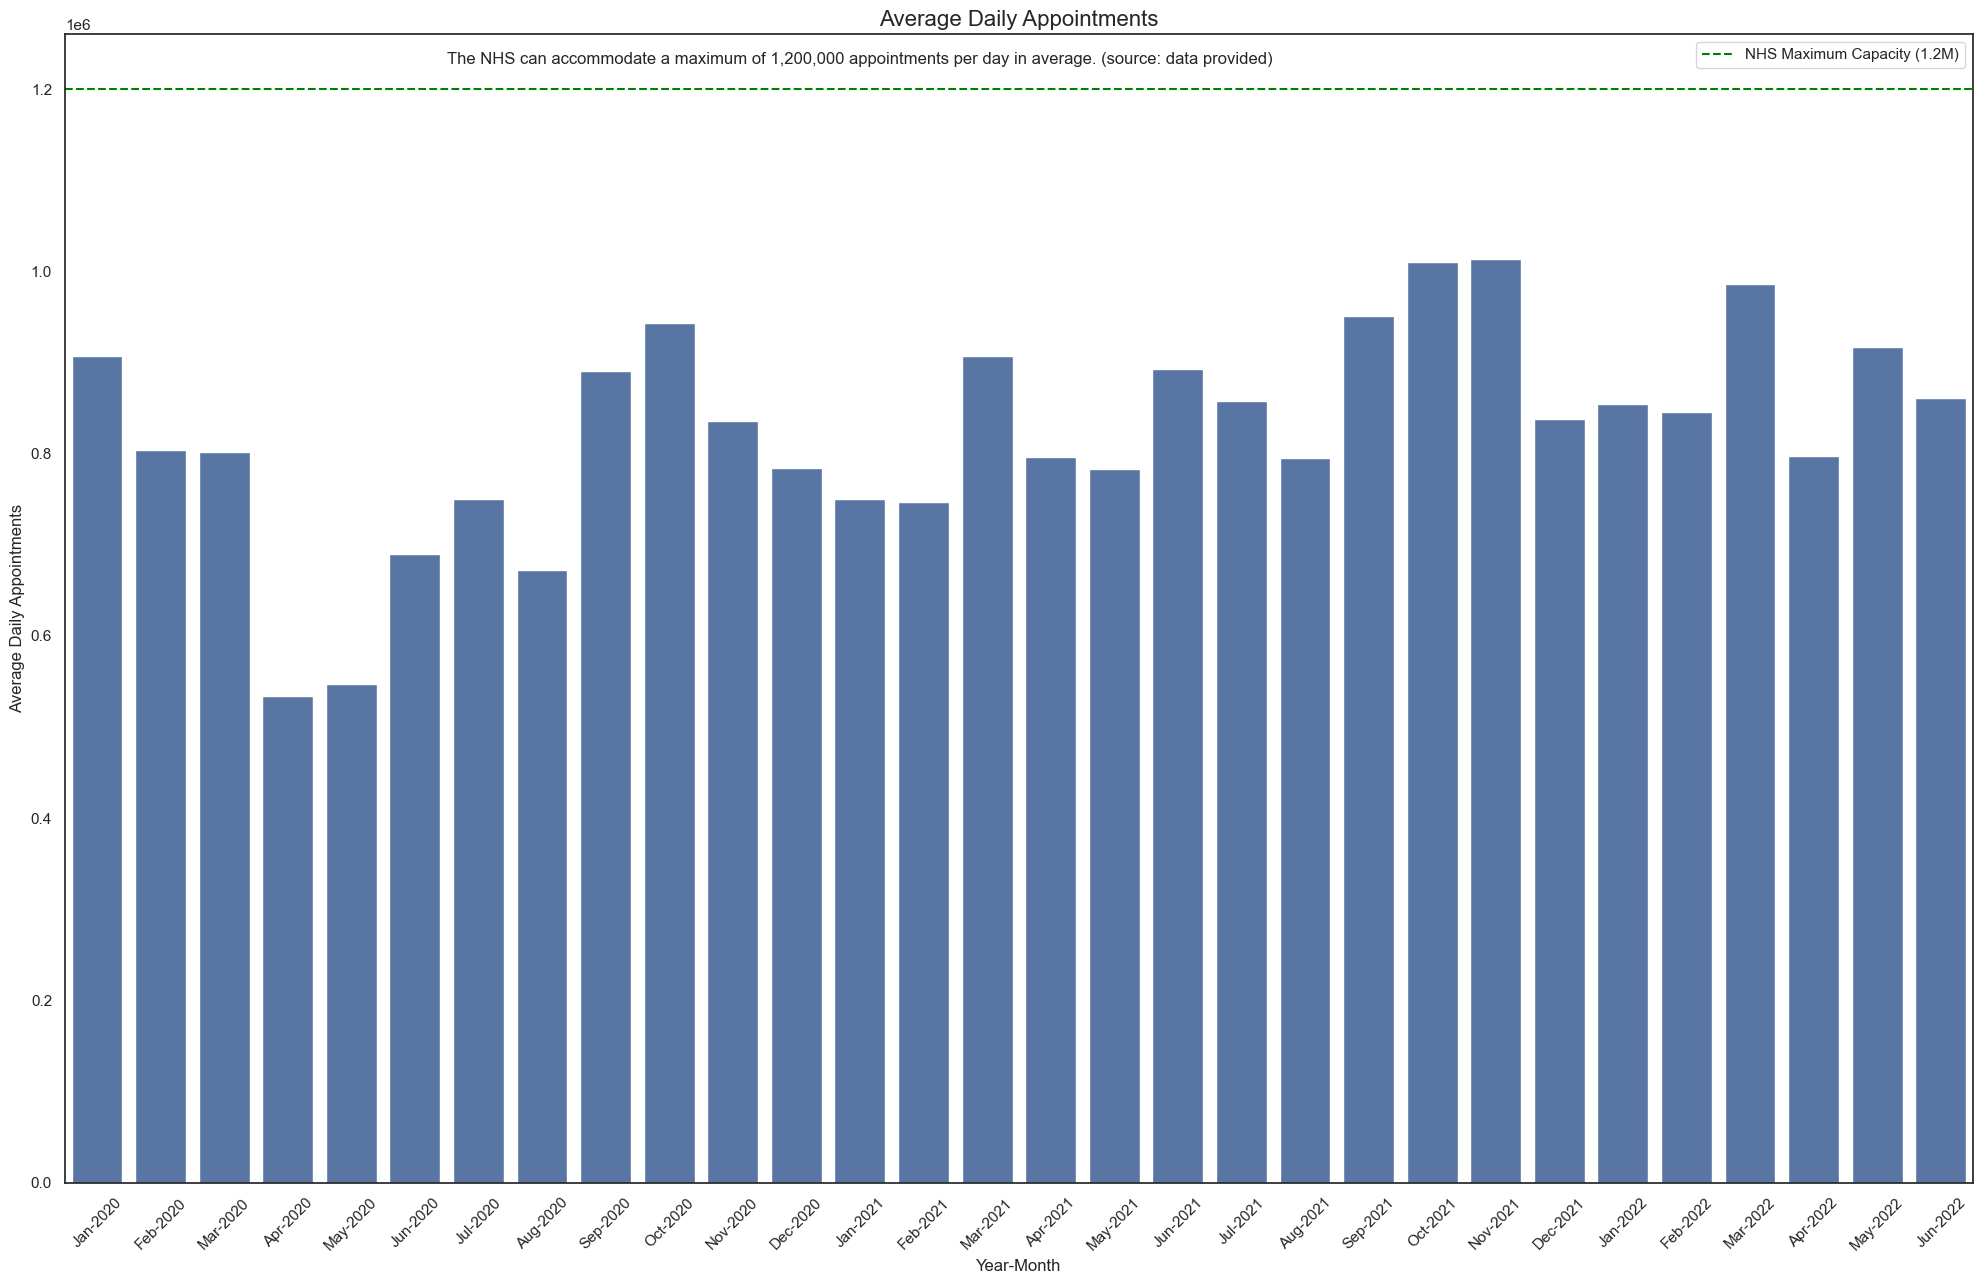

In [101]:
# Set desired figure size 
plt.figure(figsize=(20, 13))
# Create the bar chart with Seaborn
sns.barplot( x = "appointment_month", y = (ar_df['avg_daily_service_utilisation']), data = ar_df, color = "b")

# Add reference line for maximum capacity
plt.axhline( avg_daily_appointment_capacity_nhs, color = "green", linestyle="--", label = "NHS Maximum Capacity (1.2M)")

# Customize labels directly within the plot function
plt.xlabel("Year-Month")
plt.ylabel("Average Daily Appointments")
plt.xticks(rotation = 45)
plt.title("Average Daily Appointments", fontsize = 16)

# Add an annotation for better positioning
plt.annotate( "The NHS can accommodate a maximum of 1,200,000 appointments per day in average. (source: data provided)", xy = (0.2, 0.985),\
             xycoords = "axes fraction", verticalalignment="top")

# Display the plot
plt.legend()
plt.tight_layout()
plt.show()

**Question 2:** How do the healthcare professional types differ over time?

In [89]:
# Create a lineplot to view the healthcare professional types differ over time.
ar_hcp = ar_agg.groupby(['appointment_month', 'hcp_type']).agg({'count_of_appointments':'sum'}).reset_index()
ar_hcp.appointment_month = pd.to_datetime(ar_hcp.appointment_month)
ar_hcp.appointment_month = ar_hcp['appointment_month'].apply(lambda x: x.strftime('%b-%Y'))
ar_hcp

,appointment_month,hcp_type,count_of_appointments
0,Jan-2020,GP,14168932
1,Jan-2020,Other Practice staff,12326031
2,Jan-2020,Unknown,704333
3,Feb-2020,GP,12467976
4,Feb-2020,Other Practice staff,11002550
...,...,...,...
85,May-2022,Other Practice staff,12823200
86,May-2022,Unknown,878374
87,Jun-2022,GP,12893983
88,Jun-2022,Other Practice staff,12105677


In [90]:
# View the data type of the data frame
ar_hcp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   appointment_month      90 non-null     object
 1   hcp_type               90 non-null     object
 2   count_of_appointments  90 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ KB


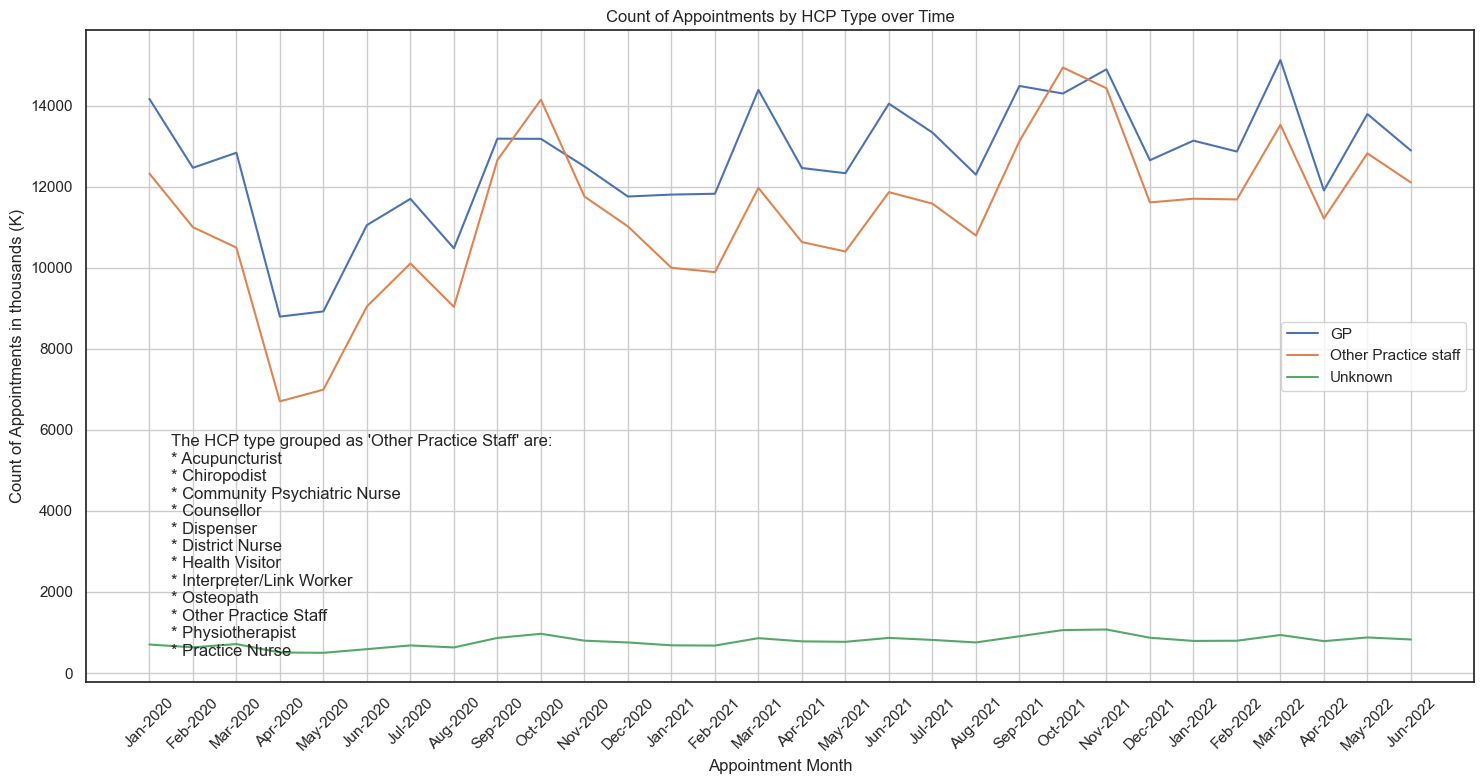

In [93]:
# Convert 'appointment_month' to datetime format
ar_agg['appointment_month'] = pd.to_datetime(ar_agg['appointment_month'])

# Create a line plot with concise loop
plt.figure(figsize = (15, 8))  
for hcp_type in ar_hcp['hcp_type'].unique():
    subset = ar_hcp[ar_hcp['hcp_type'] == hcp_type]
    plt.plot(subset['appointment_month'], (subset['count_of_appointments']/1000), label = hcp_type)

# Customize the plot
plt.xlabel('Appointment Month')
plt.ylabel('Count of Appointments in thousands (K)')
plt.title('Count of Appointments by HCP Type over Time')
plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.text(0.5,0.2,"The HCP type grouped as 'Other Practice Staff' are:\n"+
"* Acupuncturist\n"+
"* Chiropodist\n"+ 
"* Community Psychiatric Nurse\n"+
"* Counsellor\n"+
"* Dispenser\n"+
"* District Nurse\n"+
"* Health Visitor\n"+
"* Interpreter/Link Worker\n"+
"* Osteopath\n"+
"* Other Practice Staff\n"+
"* Physiotherapist\n"+
"* Practice Nurse\n")

# View the line plot
plt.show()

**Question 3:** Are there significant changes in whether or not visits are attended?

In [94]:
ar_agg.columns

Index(['appointment_month', 'appointment_status', 'hcp_type',
       'appointment_mode', 'time_between_book_and_appointment',
       'count_of_appointments'],
      dtype='object')

In [95]:
ar_agg

,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,2020-01-01,Attended,GP,Face-to-Face,1 Day,653846
1,2020-01-01,Attended,GP,Face-to-Face,15 to 21 Days,620789
2,2020-01-01,Attended,GP,Face-to-Face,2 to 7 Days,1723834
3,2020-01-01,Attended,GP,Face-to-Face,22 to 28 Days,421189
4,2020-01-01,Attended,GP,Face-to-Face,8 to 14 Days,1123186
...,...,...,...,...,...,...
10134,2022-06-01,Unknown,Unknown,Unknown,8 to 14 Days,5494
10135,2022-06-01,Unknown,Unknown,Unknown,More than 28 Days,5115
10136,2022-06-01,Unknown,Unknown,Unknown,Same Day,1914
10137,2022-06-01,Unknown,Unknown,Unknown,Unknown / Data Quality,53


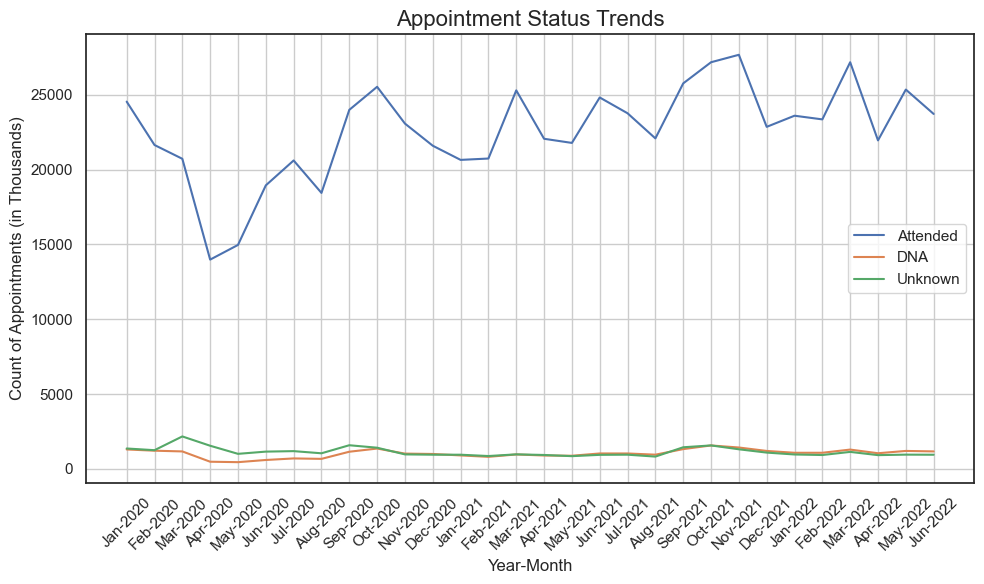

In [96]:
ar_attend = ar_agg.groupby(['appointment_month','appointment_status']).agg({'count_of_appointments':'sum'}).reset_index()
ar_attend.appointment_month = pd.to_datetime(ar_attend.appointment_month)
ar_attend.appointment_month =ar_attend['appointment_month'].apply(lambda x: x.strftime('%b-%Y'))

# Create the line plot with concise loop
plt.figure(figsize = (10, 6)) 

# Extract unique statuses and iterate
for status in ar_attend["appointment_status"].unique():
    # Filter data using boolean indexing
    filtered_data = ar_attend[ar_attend["appointment_status"] == status]
    # Plot directly with clear variable names and thousands formatting
    plt.plot(filtered_data["appointment_month"], filtered_data["count_of_appointments"]/1000, label = status)

plt.title("Appointment Status Trends", fontsize=16)
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments (in Thousands)")
plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

**Question 4:** Are there changes in terms of appointment type and the busiest months?

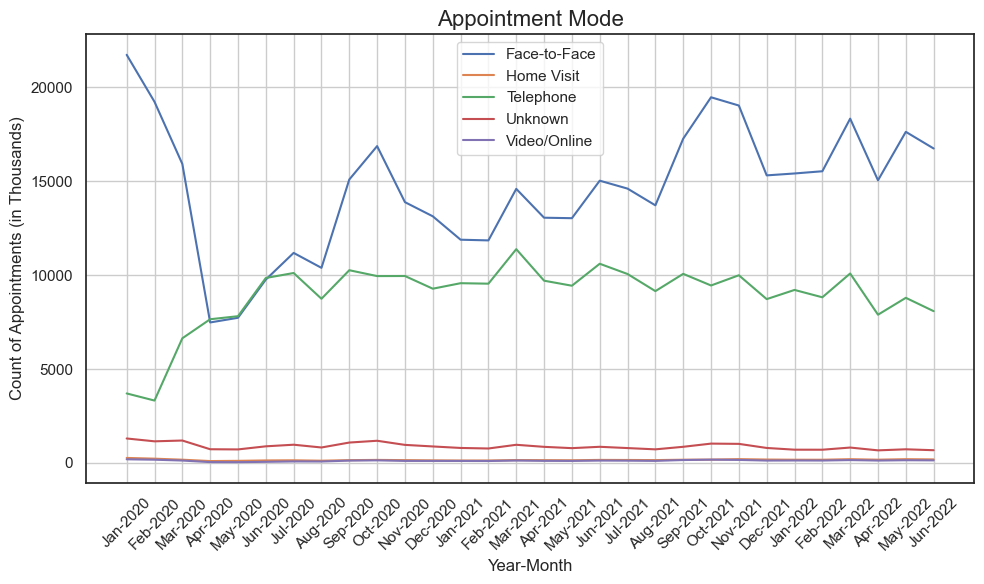

In [97]:
# Create a data frame to find the changes in appointment type by the busiest months
ar_mode = ar_agg.groupby(['appointment_month','appointment_mode']).agg({'count_of_appointments':'sum'}).reset_index()
ar_mode.appointment_month = pd.to_datetime(ar_mode.appointment_month)
ar_mode.appointment_month = ar_mode['appointment_month'].apply(lambda x: x.strftime('%b-%Y'))

# Create the line plot with concise loop and formatting
plt.figure(figsize = (10, 6)) 
for mode, group_data in ar_mode.groupby("appointment_mode"):
    plt.plot( group_data["appointment_month"], group_data["count_of_appointments"] / 1000,  # Divide by 1000 for thousands\
             label=mode)

plt.title("Appointment Mode", fontsize=16)
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments (in Thousands)")  # Adjust label for thousands
plt.xticks(rotation = 45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

**Question 5:** Are there any trends in time between booking an appointment?

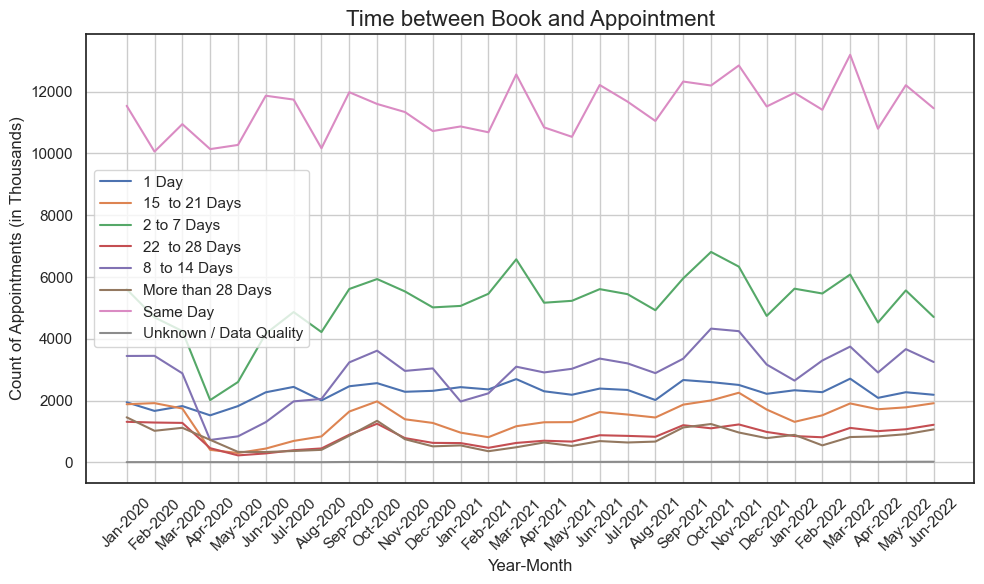

In [98]:
# Create a lineplot to answer the question.
ar_tbb = ar_agg.groupby(['appointment_month','time_between_book_and_appointment']
                       ).agg({'count_of_appointments':'sum'}).reset_index()

ar_tbb.appointment_month = pd.to_datetime(ar_tbb.appointment_month)
ar_tbb.appointment_month = ar_tbb['appointment_month'].apply(lambda x: x.strftime('%b-%Y'))

# Create the line plot with concise loop and label formatting
plt.figure(figsize=(10,6))
for key, group_data in ar_tbb.groupby("time_between_book_and_appointment"):
    # Format y-axis values with thousands separator
    # Divide by 1000 to convert to thousands
    plt.plot(group_data["appointment_month"], group_data["count_of_appointments"]/1000, label=key)

plt.title("Time between Book and Appointment", fontsize=16)
plt.xlabel("Year-Month")
plt.ylabel("Count of Appointments (in Thousands)")  # Update y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()  